# Bibliotecas 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graficos
import matplotlib.cm as cm
import seaborn as sns #graficos
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,  precision_score, recall_score, 
                             f1_score, accuracy_score, roc_curve, auc, make_scorer)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Customer-Churn-Records.csv


# Dicinário de Dados 


| **Variável**         | **Tipo**   | **Descrição**                                                                                                                                     |
|-----------------------|------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| RowNumber            | int64      | Número do registro (linhas), sem efeito na construção de modelos.                                                                                |
| CustomerId           | int64      | ID do cliente, sem efeito sobre o estudo.                                                                                                       |
| Surname              | object     | Sobrenome do cliente, sem impacto na análise.                                                                                                   |
| CreditScore          | int64      | Pontuação de crédito, pode indicar tendência de permanência de clientes com pontuação alta.                                                     |
| Geography            | object     | Localização do cliente, pode influenciar a decisão de evasão.                                                                                   |
| Gender               | object     | Gênero do cliente, possível influência na evasão.                                                                                               |
| Age                  | int64      | Idade do cliente, clientes mais velhos tendem a permanecer.                                                                                     |
| Tenure               | int64      | Anos que o cliente está no banco, clientes novos têm maior chance de evasão.                                                                    |
| Balance              | float64    | Saldo na conta, pessoas com saldos altos são menos propensas a sair.                                                                            |
| NumOfProducts        | int64      | Número de produtos adquiridos pelo cliente.                                                                                                    |
| HasCrCard            | int64      | Indica se o cliente tem cartão de crédito, clientes com cartão são menos propensos à evasão.                                                    |
| IsActiveMember       | int64      | Clientes ativos têm menor chance de evasão.                                                                                                    |
| EstimatedSalary      | float64    | Salário estimado, clientes com salários mais altos tendem a permanecer.                                                                         |
| Exited               | int64      | Indica se o cliente saiu ou não do banco, variável de predição (“churn”).                                                                       |
| Complain             | int64      | Indica se o cliente fez reclamação.                                                                                                             |
| Satisfaction Score   | int64      | Pontuação de satisfação com a resolução de reclamação.                                                                                          |
| Card Type            | object     | Tipo de cartão que o cliente possui.                                                                                                            |
| Points Earned        | int64      | Pontos ganhos pelo cliente.                                                                                                                     |


#  Análise Exploratória (EDA) & Data Prep


In [2]:
# base de dados
base_original = pd.read_csv('/kaggle/input/Customer-Churn-Records.csv', sep=',')

#configs para nao quebrar linhas no print do  df
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.max_columns', None)

#primeiras linhas 
base_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
#Dimensões da base de dados
print("Numero de linhas:", base_original.shape[0]) #10.000 linhas originais.
print("Numero de colunas:", base_original.shape[1])# 18 Colunas (variaveis) originais.

Numero de linhas: 10000
Numero de colunas: 18


In [4]:
#Verificando nome das colunas e tipos
base_original.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [5]:
#checando se há valores nulos 
base_original.isnull().sum()  

#como podemos ver não há valores nulos em nenhuma das variáveis

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Resumo estatistico da base original
base_original.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
# Limpando variavéis que não tem interferencia na analise, 
#meramente identificadoras: 	RowNumber, CustomerId e Surname

df = base_original[['CreditScore',
                    'Gender',
                    'Geography',
                    'Age','Tenure',
                    'Balance',
                   'NumOfProducts',
                    'HasCrCard',
                    'IsActiveMember',
                   'EstimatedSalary',
                    'Complain',
                    'Satisfaction Score',
                   'Card Type',
                    'Point Earned',
                    'Exited'
                   ]]


# Resumo estatístico das variáveis quantitativas
quanti = df[['EstimatedSalary', 'Balance', 'CreditScore', 'Age', 'Tenure', 'Point Earned']]
resumo_estati_quant = quanti.describe().style.format(lambda x: f'{x:,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.')) # Formatação com 1 casa decimal e separadores invertidos

resumo_estati_quant

,EstimatedSalary,Balance,CreditScore,Age,Tenure,Point Earned
count,"10.000,0","10.000,0","10.000,0","10.000,0","10.000,0","10.000,0"
mean,"100.090,2","76.485,9","650,5","38,9","5,0","606,5"
std,"57.510,5","62.397,4","96,7","10,5","2,9","225,9"
min,"11,6","0,0","350,0","18,0","0,0","119,0"
25%,"51.002,1","0,0","584,0","32,0","3,0","410,0"
50%,"100.193,9","97.198,5","652,0","37,0","5,0","605,0"
75%,"149.388,2","127.644,2","718,0","44,0","7,0","801,0"
max,"199.992,5","250.898,1","850,0","92,0","10,0","1.000,0"


In [8]:
#%% Resumo estatistico das varaiveis Quali (tabelas de frequencias)
quali = df[['HasCrCard', 'IsActiveMember', 'Geography','Gender'
            ,'Complain','Exited','Card Type']]
quali = quali.astype('object')
print("------------------------------------------")
print(quali['HasCrCard'].value_counts())
print("------------------------------------------")
print(quali['IsActiveMember'].value_counts())
print("------------------------------------------")
print(quali['Geography'].value_counts())
print("------------------------------------------")
print(quali['Gender'].value_counts())
print("------------------------------------------")
print(quali['Complain'].value_counts())
print("------------------------------------------")
print(quali['Card Type'].value_counts())
print("------------------------------------------")
print(quali['Exited'].value_counts())
print("------------------------------------------")

------------------------------------------
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
------------------------------------------
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
------------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
------------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
------------------------------------------
Complain
0    7956
1    2044
Name: count, dtype: int64
------------------------------------------
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
------------------------------------------
Exited
0    7962
1    2038
Name: count, dtype: int64
------------------------------------------


In [9]:
# Verificando tipos das variaveis quali (para morrer de certeza que estao no formato qualitativo, categorico)
quali.dtypes

HasCrCard         object
IsActiveMember    object
Geography         object
Gender            object
Complain          object
Exited            object
Card Type         object
dtype: object

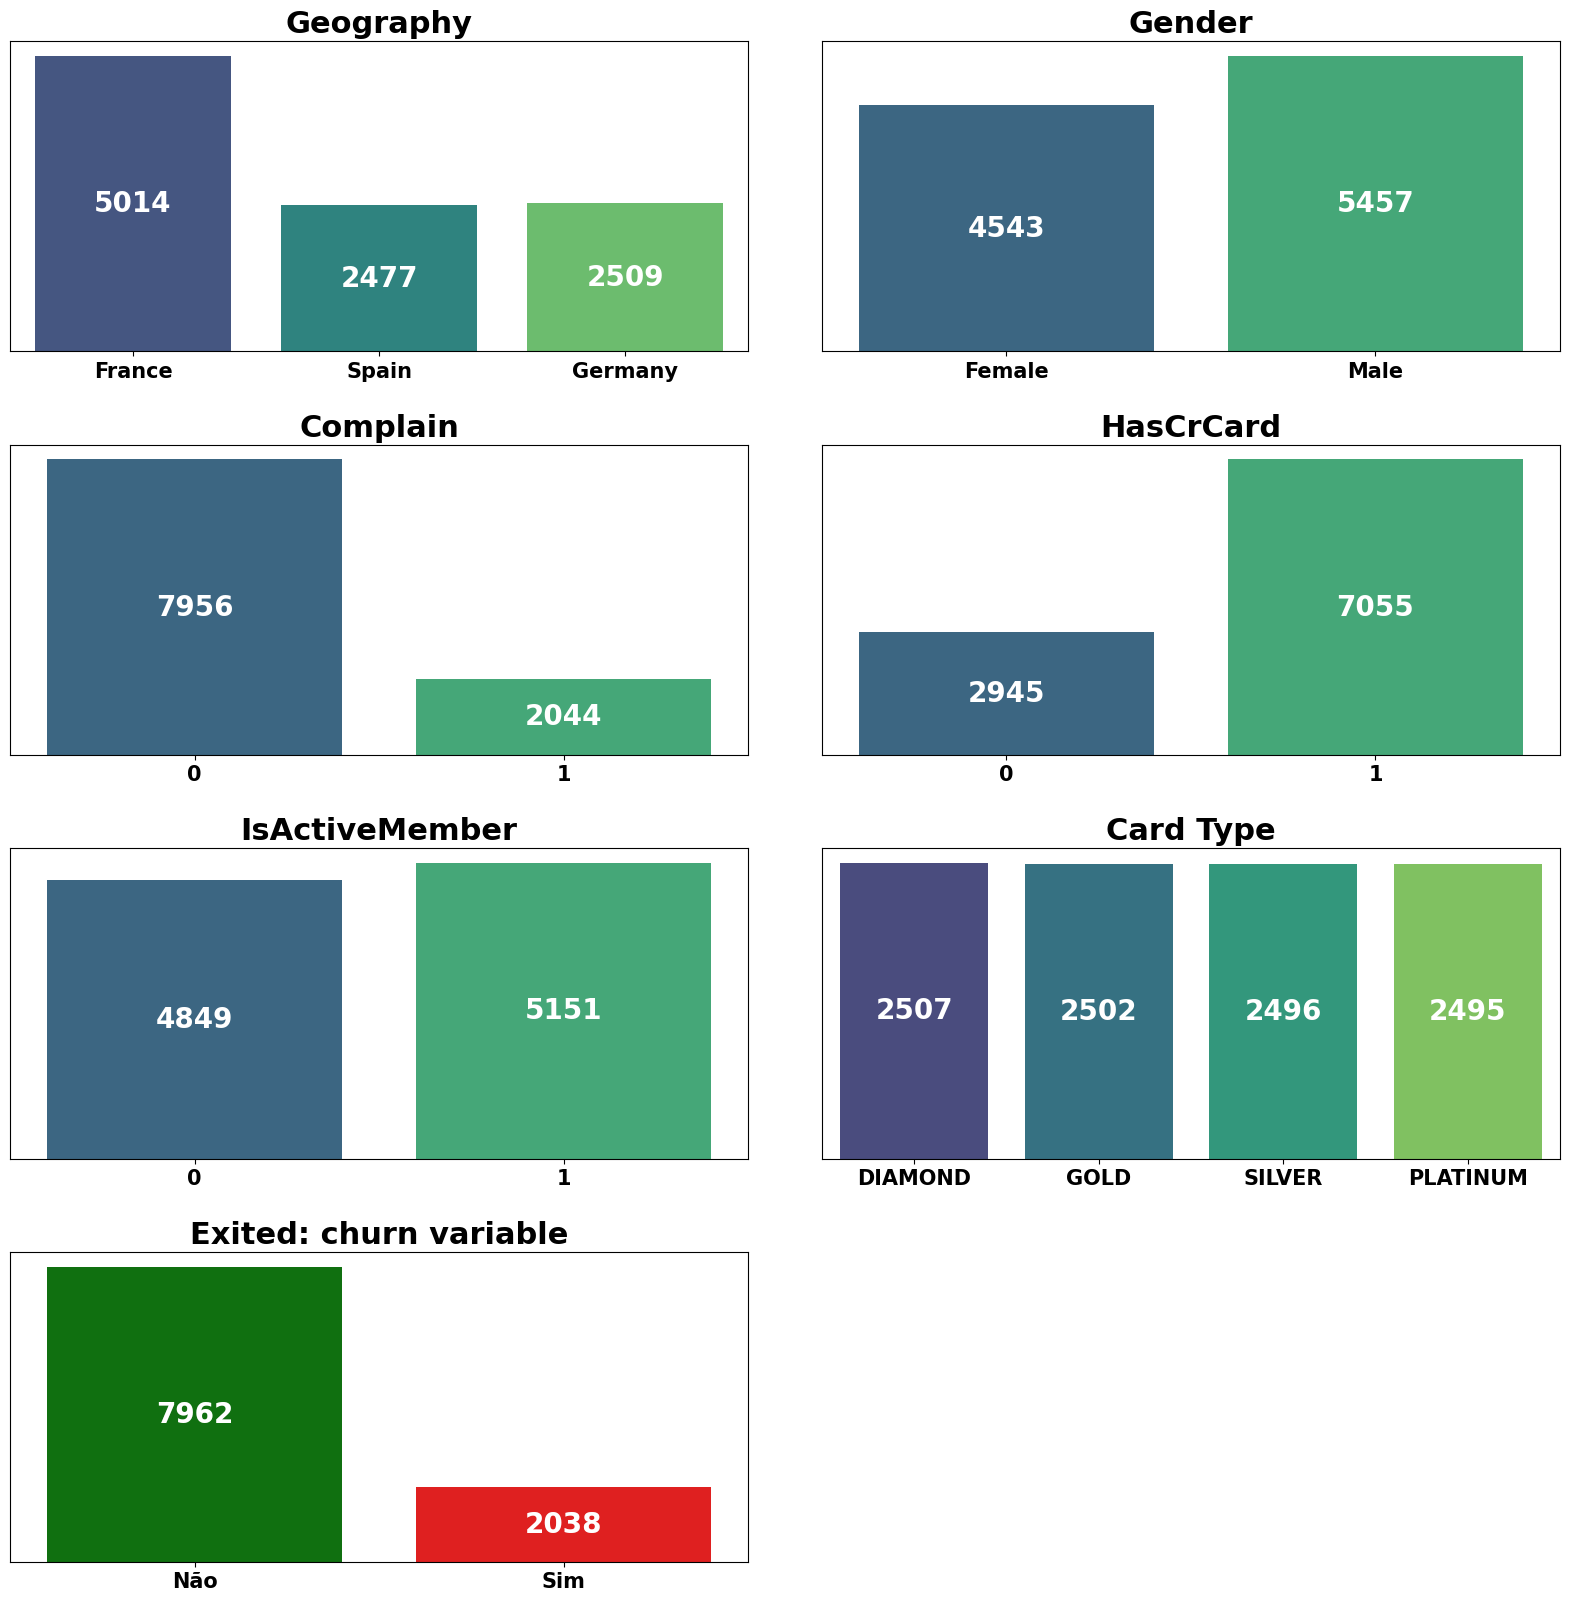

In [10]:
# Frequencia das variaveis categoricas 
#%%Analises gráficas: variaveis Categóricas 


def add_value_labels(ax):#funcao que adc rótulos de dados com fundo arredondado nas barras do gráfico
    for p in ax.patches:
        height = p.get_height()
        color = p.get_facecolor()  # Obtém a cor da barra
        # rótulo no centro da barra com fundo da mesma cor da barra e bordas arredondadas
        ax.text(p.get_x() + p.get_width() / 2., height / 2.,
                f'{int(height)}',  # Formata o valor para int
                ha='center', va='center', fontsize=20, color='white', fontweight='bold',
                bbox=dict(facecolor=color, edgecolor='none', alpha=0.7,
                          boxstyle='round,pad=0.4', linewidth=1))

plt.figure(figsize=(20, 25))


#plt.suptitle('Frequência absoluta\n das variaveis qualitativas', fontsize=45)

# Geography
plt.subplot(5, 2, 1)
ax1 = plt.gca()
ax1.set_title('Geography', fontsize=22, fontweight='bold')
sns.countplot(x='Geography', palette='viridis', data=base_original, ax=ax1)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax1)

# Gender
plt.subplot(5, 2, 2)
ax2 = plt.gca()
ax2.set_title('Gender', fontsize=22, fontweight='bold')
sns.countplot(x='Gender', palette='viridis', data=base_original, ax=ax2)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax2)
# Complain
plt.subplot(5, 2, 3)
ax10 = plt.gca()
ax10.set_title('Complain', fontsize=22, fontweight='bold')
sns.countplot(x='Complain', palette='viridis', data=base_original, ax=ax10)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax10)

# HasCrCard
plt.subplot(5, 2, 4)
ax5 = plt.gca()
ax5.set_title('HasCrCard', fontsize=22, fontweight='bold')
sns.countplot(x='HasCrCard', palette='viridis', data=base_original, ax=ax5)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax5)

# IsActiveMember
plt.subplot(5, 2, 5)
ax6 = plt.gca()
ax6.set_title('IsActiveMember', fontsize=22, fontweight='bold')
sns.countplot(x='IsActiveMember', palette='viridis', data=base_original, ax=ax6)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax6)

# Card Type
plt.subplot(5, 2, 6)
ax10 = plt.gca()
ax10.set_title('Card Type', fontsize=22, fontweight='bold')
sns.countplot(x='Card Type', palette='viridis', data=base_original, ax=ax10)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax10)

# Exited
plt.subplot(5, 2, 7)
ax7 = plt.gca()
ax7.set_title('Exited: churn variable', fontsize=22, fontweight='bold')
custom_palette = ['green', 'red']
sns.countplot(x='Exited', palette=custom_palette, data=base_original, ax=ax7)
plt.xlabel('') 
plt.ylabel('') 
plt.xticks(fontsize=15, rotation=0,fontweight='bold')
plt.yticks([])
add_value_labels(ax7)


ax7.set_xticks([0, 1])  # Define os ticks manualmente
ax7.set_xticklabels(['Não', 'Sim'], fontsize=15, fontweight='bold')  # Rótulos personalizados
add_value_labels(ax7)


# ajusta a distância entre os gráficos
plt.subplots_adjust(hspace=0.3, wspace=0.1)




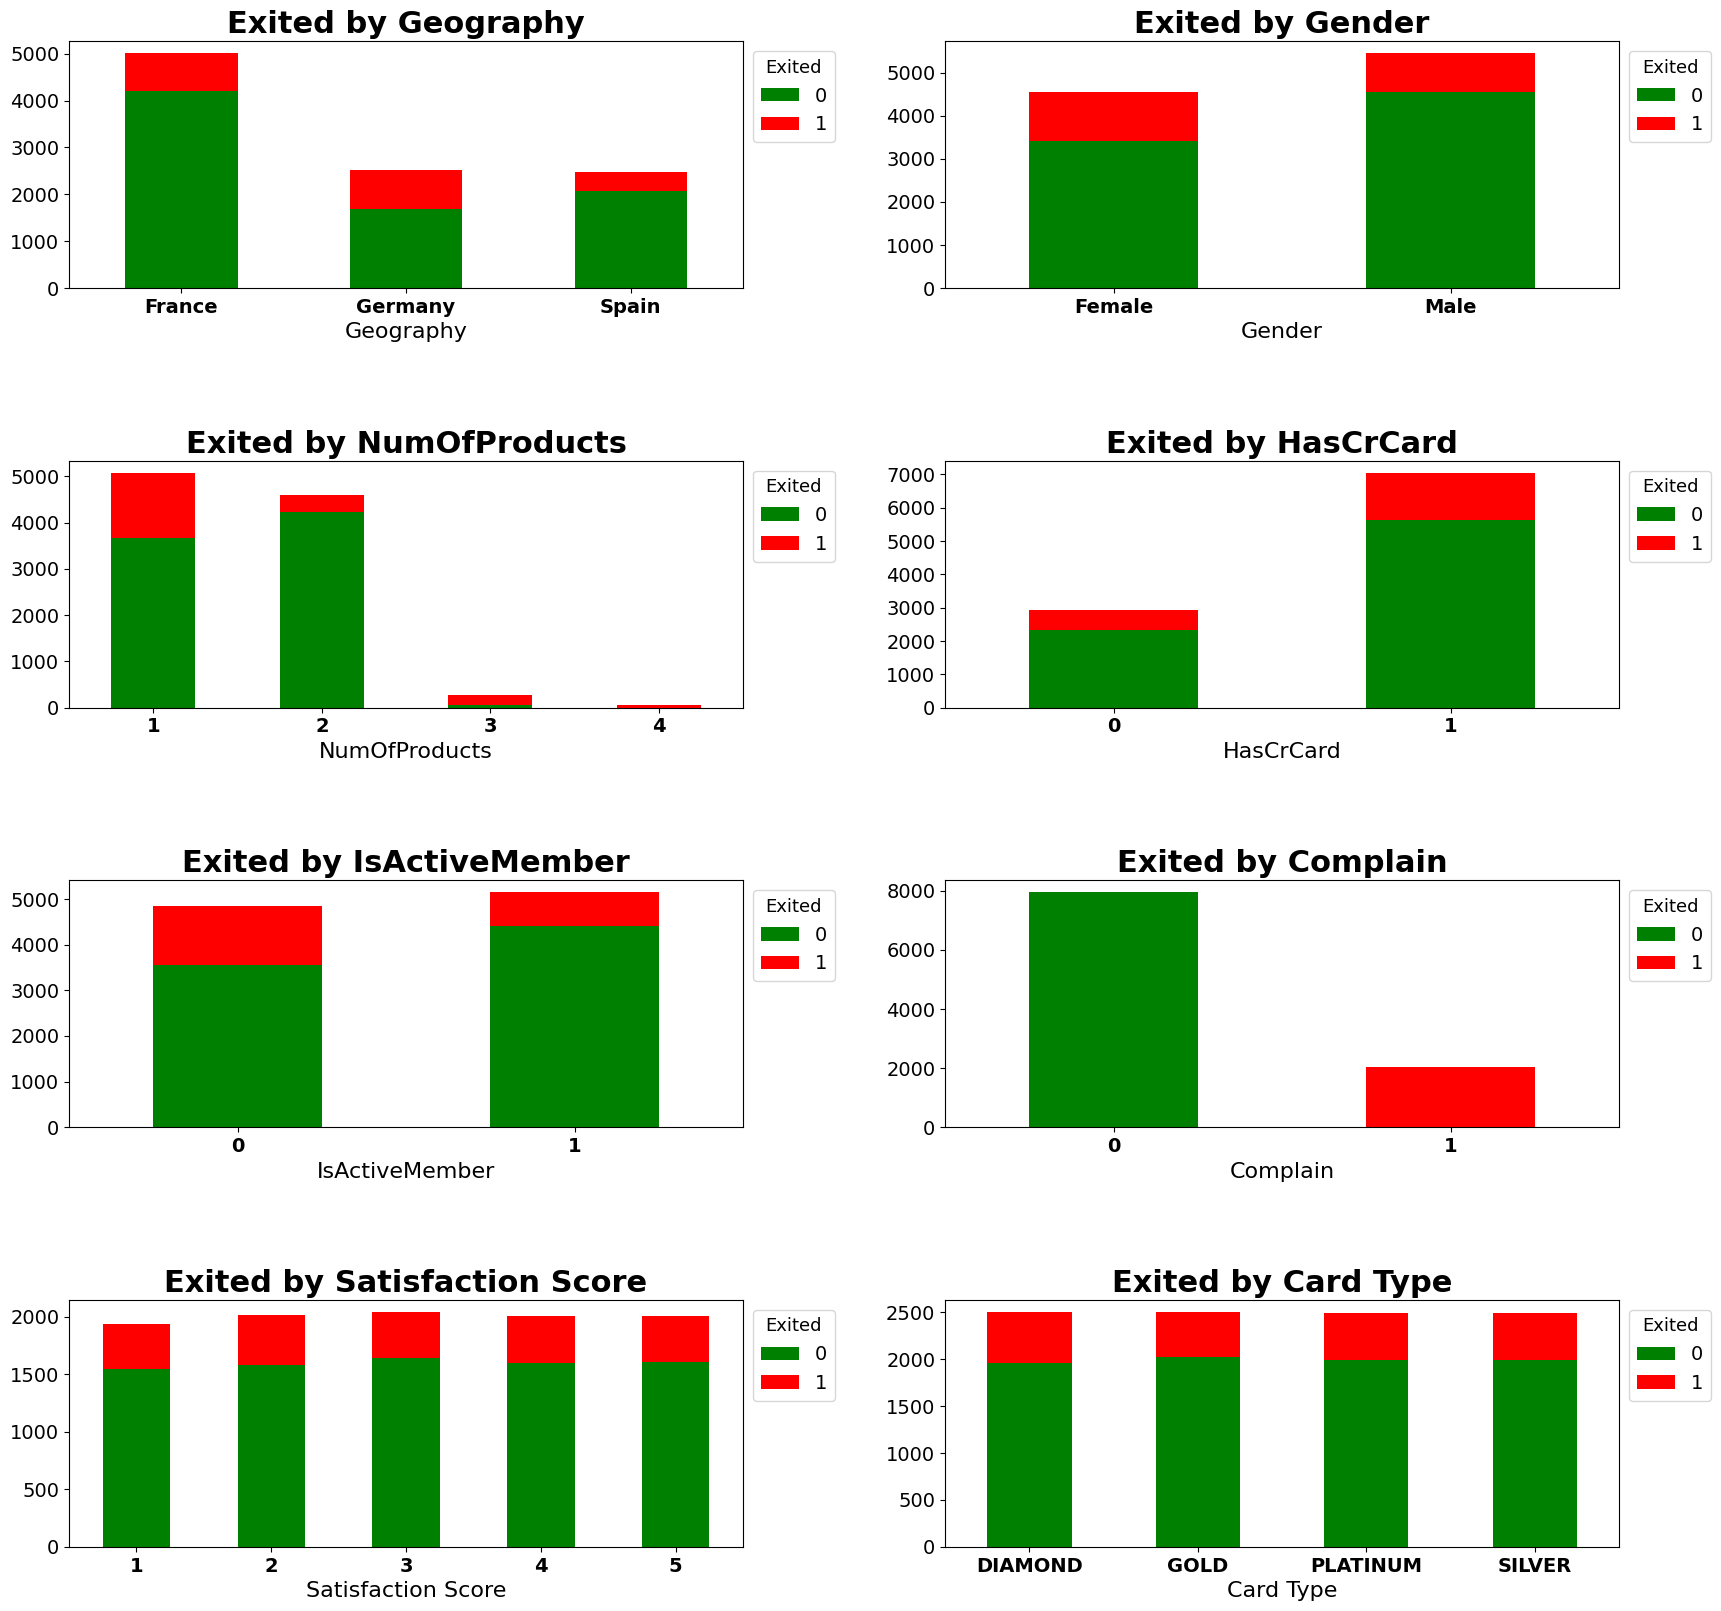

In [11]:
#%% Variável TARGET em relação as demais variáveis 

plt.figure(figsize=(20, 25))

def add_legend(ax):
    """Adiciona a legenda no canto superior direito e garante que os rótulos sejam exibidos"""
    handles, labels = ax.get_legend_handles_labels()
    if not handles:
        # Se não houver handles, adicione manualmente
        handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['green', 'red']]
        labels = ['Not Exited', 'Exited']
    # Adiciona a legenda fora da área das barras
    ax.legend(handles, labels, loc='upper left', fontsize=14, title='Exited', title_fontsize='13',
              bbox_to_anchor=(1.0, 1))  # Ajusta a posição da legenda para fora das barras

# Geography
plt.subplot(5, 2, 1)
counts = base_original.groupby(['Geography', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Geography', fontsize=22, fontweight='bold')
plt.xlabel('Geography', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Gender
plt.subplot(5, 2, 2)
counts = base_original.groupby(['Gender', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca()) 
plt.title('Exited by Gender', fontsize=22, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# NumOfProducts
plt.subplot(5, 2, 3)
counts = base_original.groupby(['NumOfProducts', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by NumOfProducts', fontsize=22, fontweight='bold')
plt.xlabel('NumOfProducts', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# HasCrCard
plt.subplot(5, 2, 4)
counts = base_original.groupby(['HasCrCard', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by HasCrCard', fontsize=22, fontweight='bold')
plt.xlabel('HasCrCard', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# IsActiveMember
plt.subplot(5, 2, 5)
counts = base_original.groupby(['IsActiveMember', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca()) 
plt.title('Exited by IsActiveMember', fontsize=22, fontweight='bold')
plt.xlabel('IsActiveMember', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Complain
plt.subplot(5, 2, 6)
counts = base_original.groupby(['Complain', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Complain', fontsize=22, fontweight='bold')
plt.xlabel('Complain', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Satisfaction Score
plt.subplot(5, 2, 7)
counts = base_original.groupby(['Satisfaction Score', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Satisfaction Score', fontsize=22, fontweight='bold')
plt.xlabel('Satisfaction Score', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Card Type
plt.subplot(5, 2, 8)
counts = base_original.groupby(['Card Type', 'Exited']).size().unstack().fillna(0)
ax = counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())  
plt.title('Exited by Card Type', fontsize=22, fontweight='bold')
plt.xlabel('Card Type', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=14, rotation=0,fontweight='bold')
plt.yticks(fontsize=14)
add_legend(ax)

# Ajustar a distância entre os gráficos
plt.subplots_adjust(hspace=0.7, wspace=0.3)

# Variaveis Dummies e Correlações 

In [12]:
# Dumizando

# Transformando colunas específicas em tipo object usando .loc para evitar o Warning
cols_to_transform = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'Card Type']
df.loc[:, cols_to_transform] = df[cols_to_transform].astype('object')



# Gerando as dummies
df_dummies = pd.get_dummies(df,
                           columns=['HasCrCard',
                                    'IsActiveMember', 
                                    'Geography',
                                    'Gender',
                                    'Card Type'],
                           dtype=int,
                           drop_first=False)


#Transformando Target em numérica
df_dummies['Exited'] = df_dummies['Exited'].astype('int64')



#verificando tipos gerados
df_dummies.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Exited                  int64
HasCrCard_0             int64
HasCrCard_1             int64
IsActiveMember_0        int64
IsActiveMember_1        int64
Geography_France        int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Female           int64
Gender_Male             int64
Card Type_DIAMOND       int64
Card Type_GOLD          int64
Card Type_PLATINUM      int64
Card Type_SILVER        int64
dtype: object

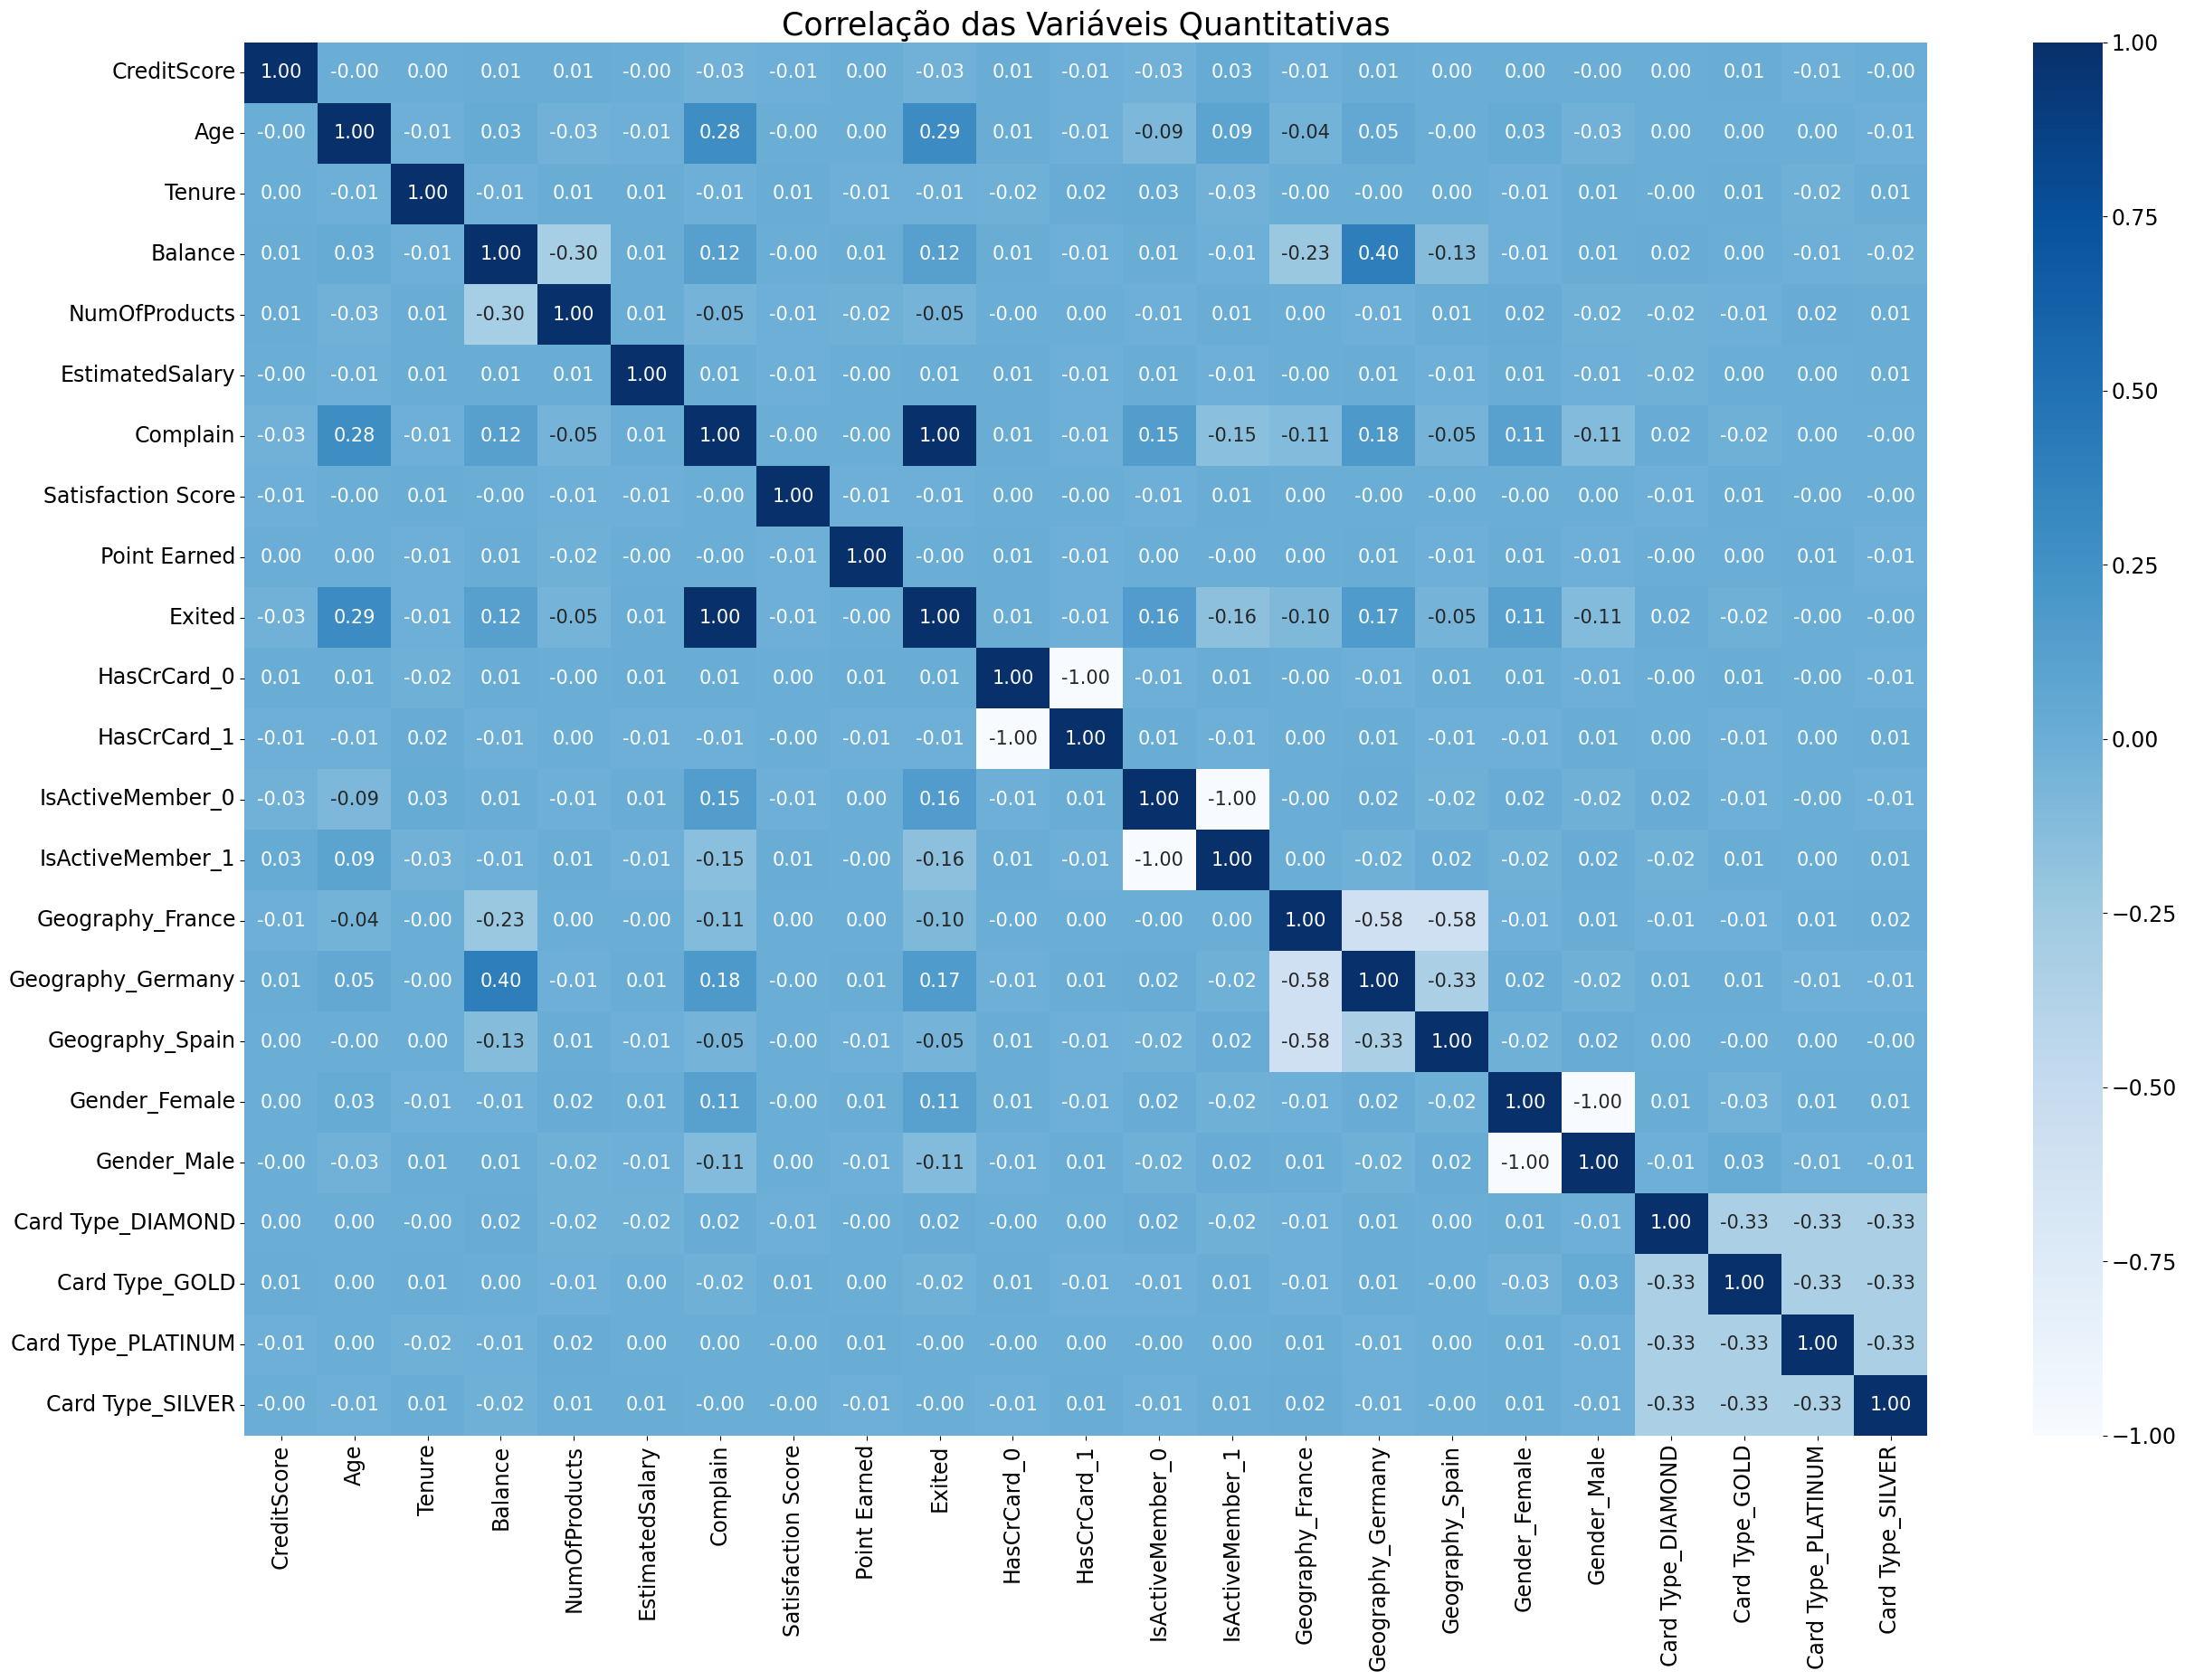

In [13]:
#%%Analises gráficas: correlação das variaveis Numéricas 

correlation_matrix = df_dummies.corr().round(2)
correlation_matrix

# Mapa de calor das variaveis quanti
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
                      cmap=plt.cm.Blues,
                      annot_kws={'size': 15}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.title('Correlação das Variáveis Quantitativas', fontsize=25)
plt.show()


#apresentaram correlacao alta, para evitar multicolinearidade foram removidas 
df_dummies = df_dummies.drop(columns=['HasCrCard_0','IsActiveMember_0','Gender_Female','Complain'])


# Separação Treino e Teste

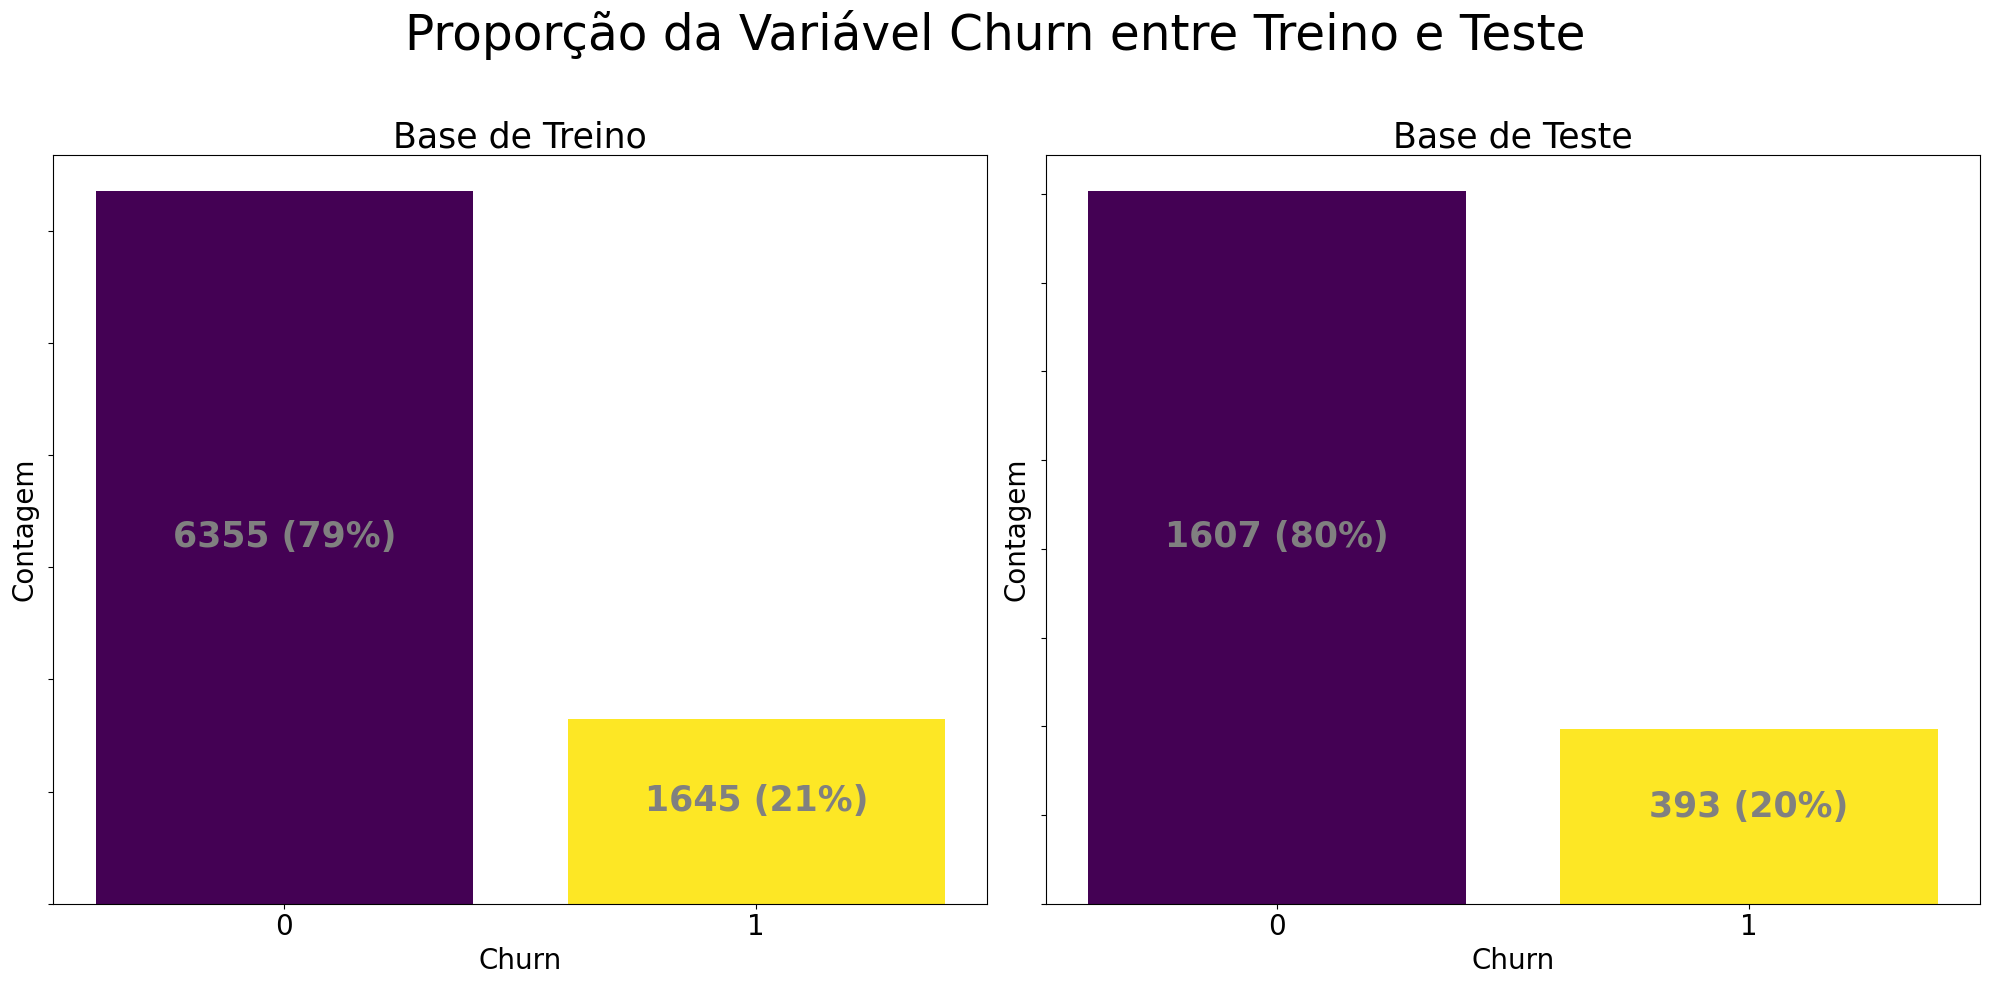

In [14]:
#X ---> Variáveis explicativas 

#Y ---> Evento de estudo (variável TARGET)

X = df_dummies .drop('Exited', axis=1)

y =  df_dummies['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Verificando a proporção de eventos de churn (TARGET) nas bases de TREINO e TESTE 

# Contando os valores 
churn_counts_train = y_train.value_counts()
churn_counts_test = y_test.value_counts()

# Criando o plot com subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Adicionando título geral ao plot
fig.suptitle('Proporção da Variável Churn entre Treino e Teste', fontsize=35)

#definindo a paleta de cor padrao a ser usada nos dois graficos 
cmap = plt.get_cmap('viridis', 2)

# Gráfico da base de treino
bars_train = axs[0].bar(churn_counts_train.index, churn_counts_train.values, color=cmap(range(2)))
axs[0].set_title('Base de Treino', fontsize=25)
axs[0].set_xlabel('Churn', fontsize=20)
axs[0].set_ylabel('Contagem', fontsize=20)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['0', '1'], fontsize=20)

# Ocultando os valores do eixo y
axs[0].set_yticklabels([])

# Adicionando rótulos de dados nas barras da base de treino com valor absoluto e percentual
total_train = churn_counts_train.sum()
for bar in bars_train:
    count = int(bar.get_height())
    percentage = round(count / total_train * 100)  # Arredonda a porcentagem
    label = f'{count} ({percentage}%)'  # Exibe o valor absoluto e o percentual
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
                label, ha='center', color='gray', fontsize=25, weight='bold')

# Gráfico da base de teste
bars_test = axs[1].bar(churn_counts_test.index, churn_counts_test.values, color=cmap(range(2)))
axs[1].set_title('Base de Teste', fontsize=25)
axs[1].set_xlabel('Churn', fontsize=20)
axs[1].set_ylabel('Contagem', fontsize=20)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['0', '1'], fontsize=20)

# Ocultando os valores do eixo y
axs[1].set_yticklabels([])

# Adicionando rótulos de dados nas barras da base de teste com valor absoluto e percentual
total_test = churn_counts_test.sum()
for bar in bars_test:
    count = int(bar.get_height())
    percentage = round(count / total_test * 100)  # Arredonda a porcentagem
    label = f'{count} ({percentage}%)'  # Exibe o valor absoluto e o percentual
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, 
                label, ha='center', color='gray', fontsize=25, weight='bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixa espaço para o título principal
plt.show()

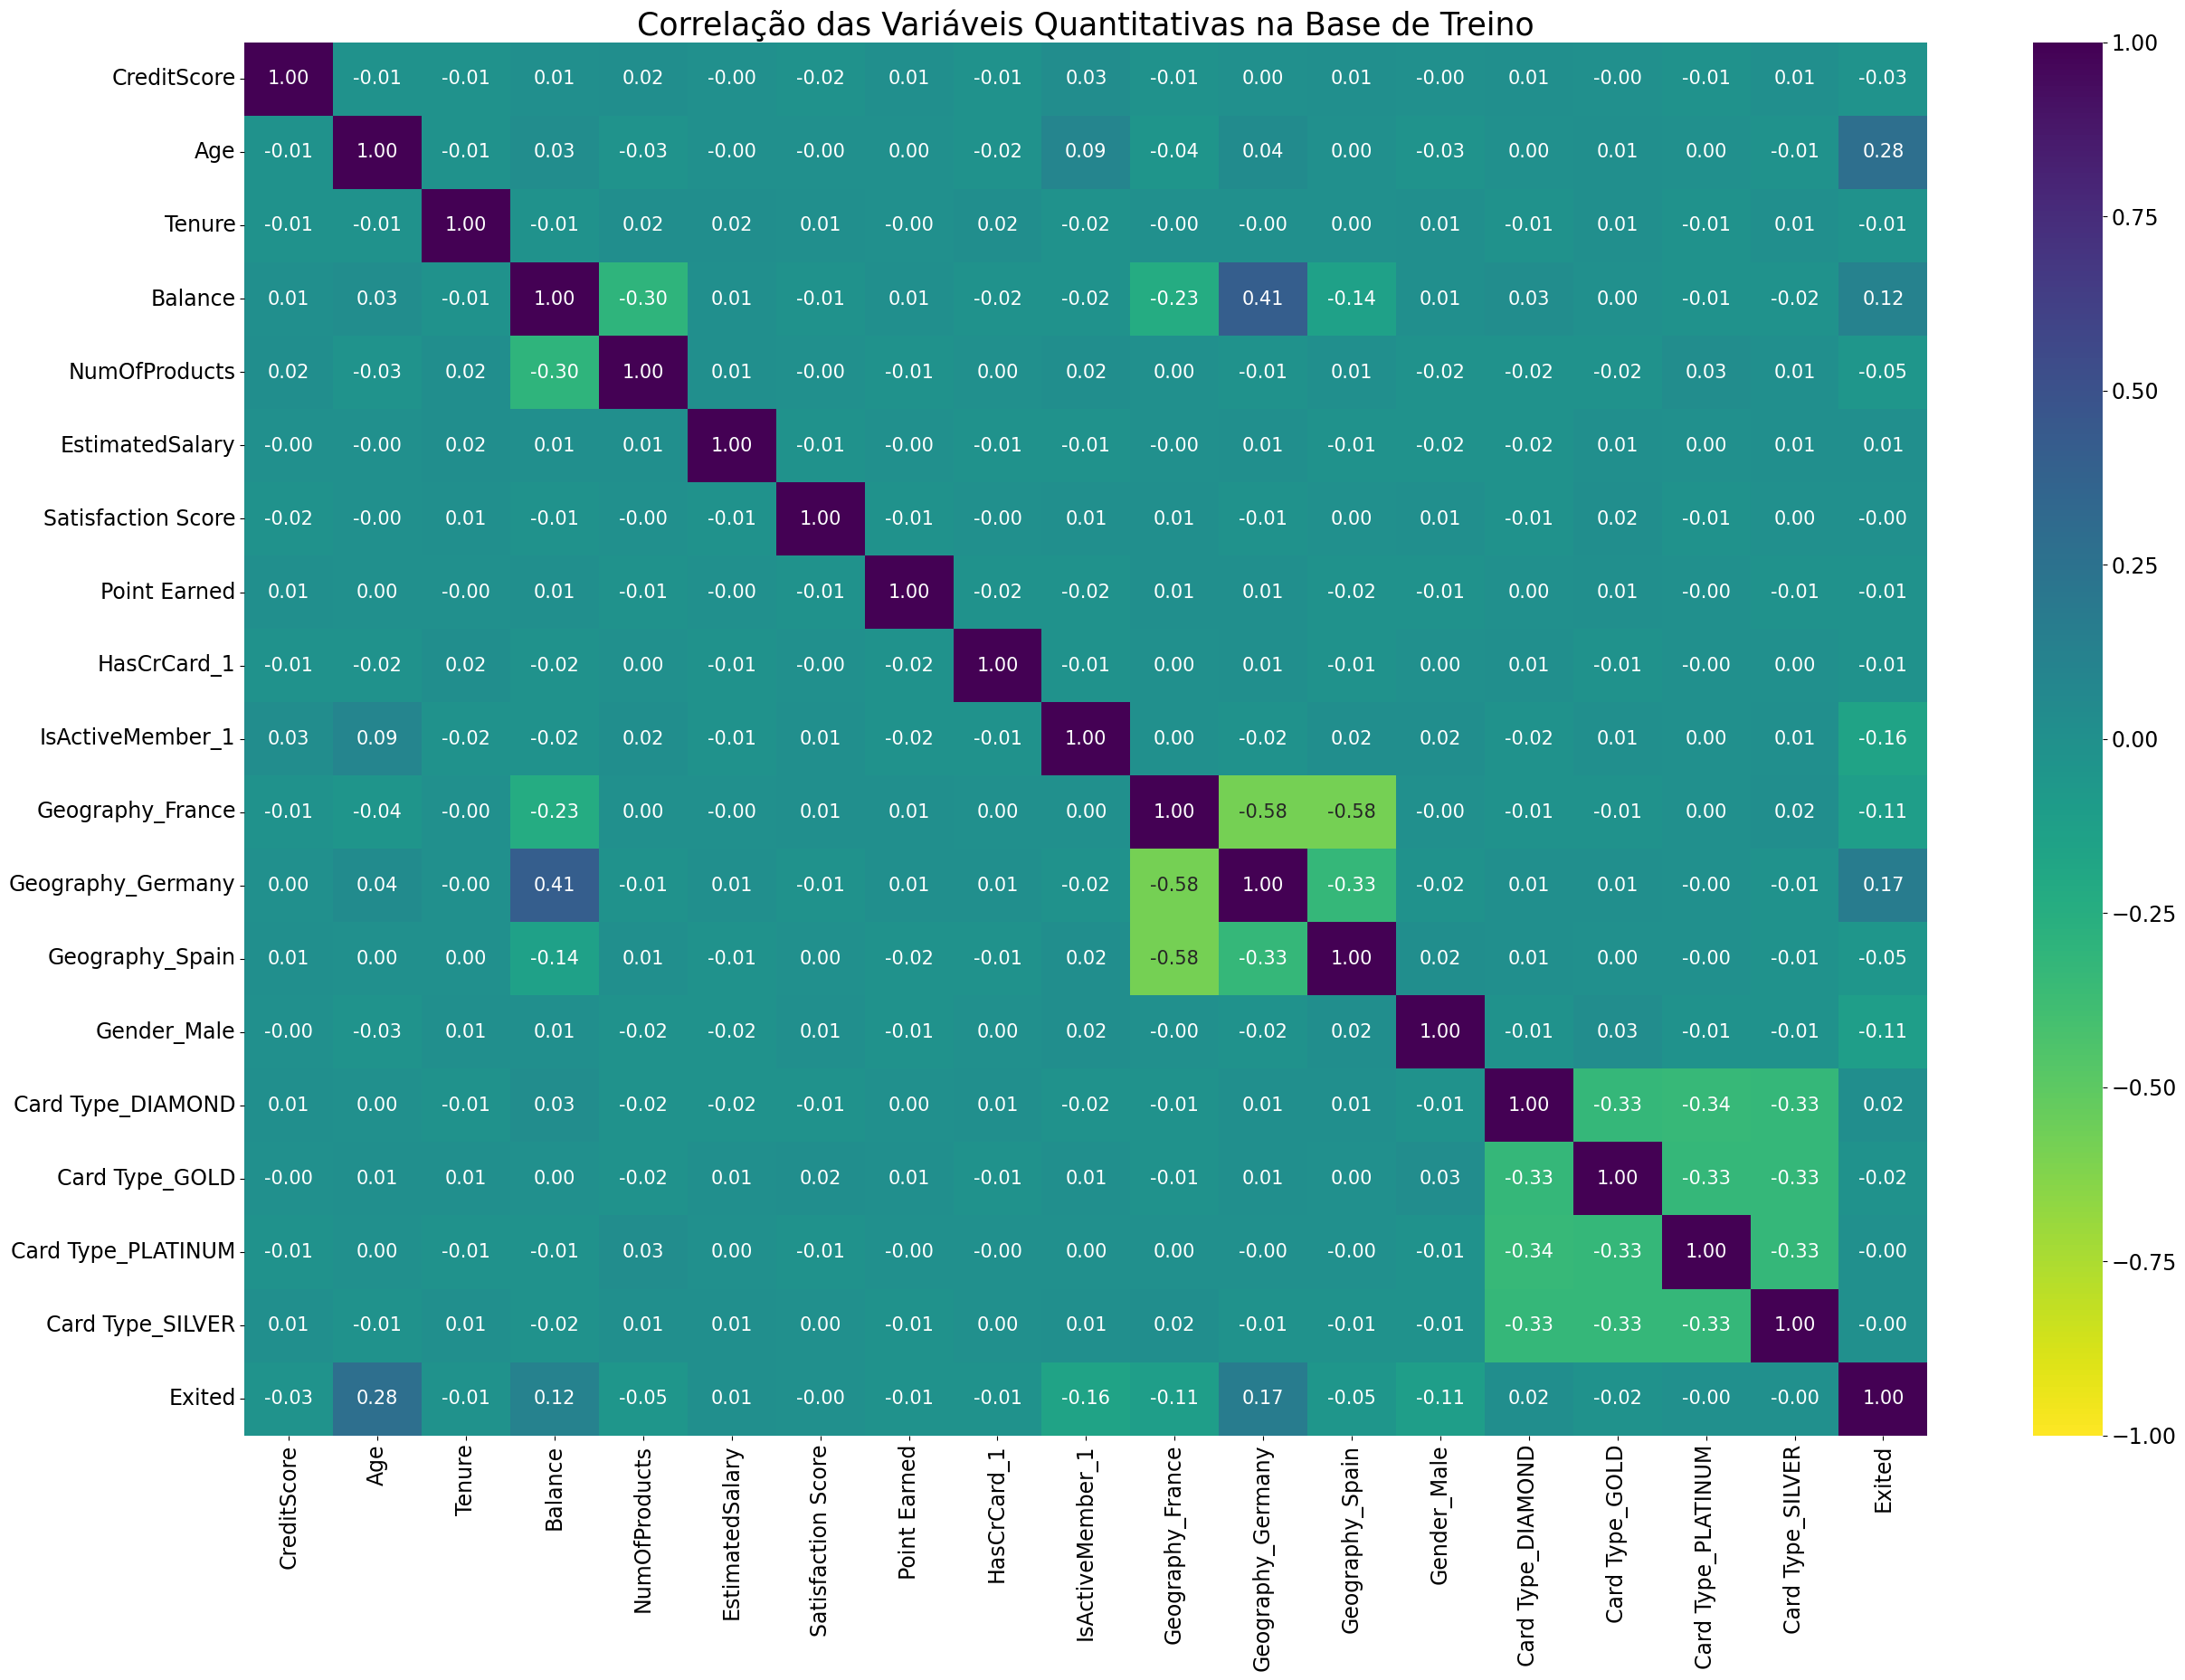

In [15]:
#%% Testando Multicolinearidade na base de treino

#Aqui é só para morrer de certeza, para evitar que o modelo treine errado ou sofra com multicolinearidade. 

# todo esse processo de tirar as variaveis que tem alta correlacao com a variavel target pode ser analisado se realmente é necessario, a depender do modelo 
# existem modelos que capturam bem isso e não são afetados pela multicolinearidade, nesse estudo vamos testar das duas formas, com e sem essas variáveis. 

teste_multco_treino = pd.concat([X_train,y_train], axis = 1)

correlation_matrix_treino = teste_multco_treino.corr().round(2)
correlation_matrix_treino

# Mapa de calor das variaveis quanti (SEM COMPLAIN)
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(correlation_matrix_treino, annot=True, fmt=".2f",
                      cmap=plt.cm.viridis_r, # é importante notar que a paleta de cores viridis (ou viridis_r para o inverso de cores) é uma paleta especial 
                                             # para facilitar a visualizacao por pessoas com dificuldades, como os daltonicos. 
                      annot_kws={'size': 15}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
plt.title('Correlação das Variáveis Quantitativas na Base de Treino',fontsize=25)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

# Analise e tratamento de Outliers 

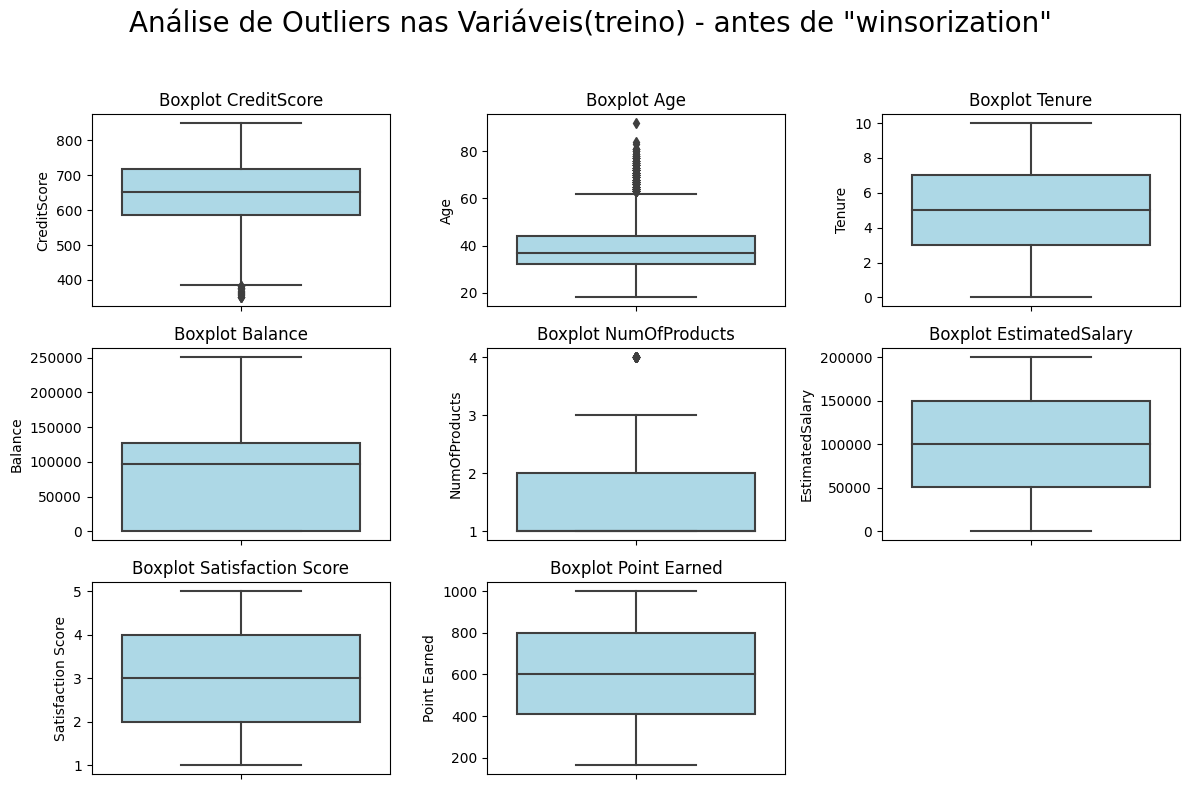

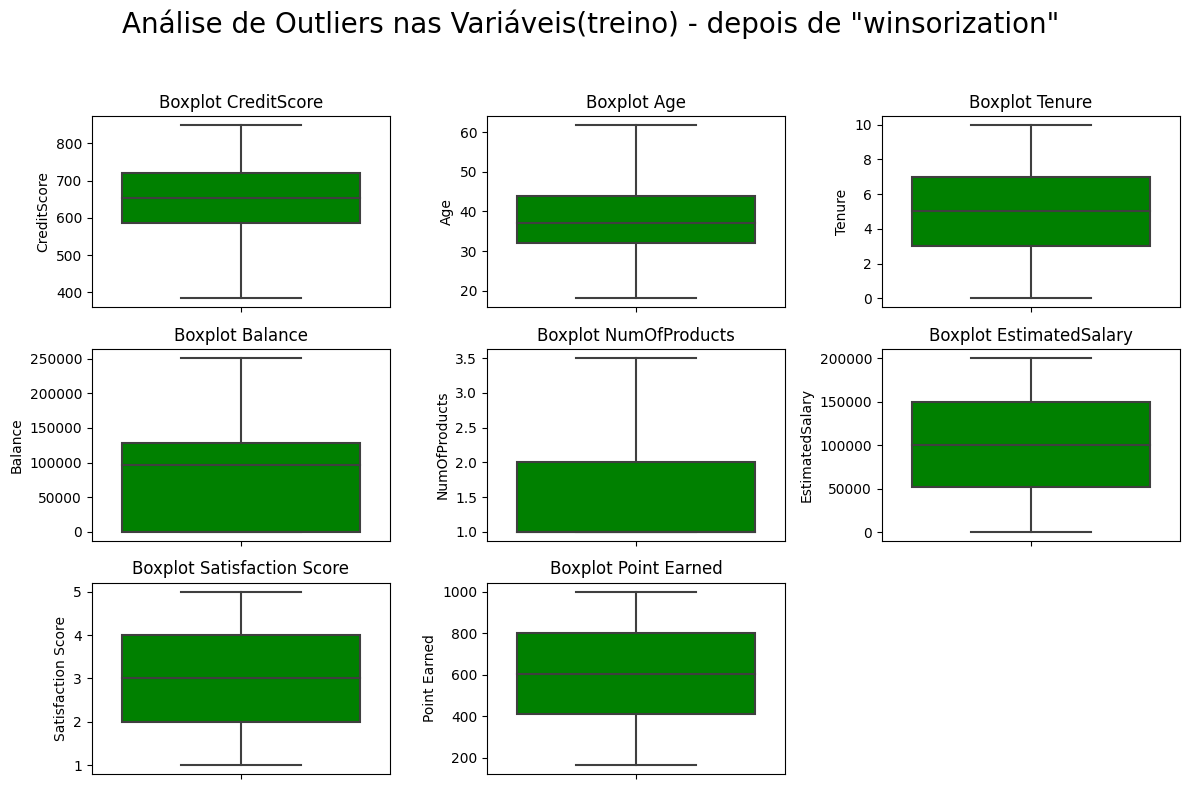

In [16]:
#%% analise de outliers das variaveis na base de treino 


#avariaveis analisadas (numéricas)
variaveis = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary',
    'Satisfaction Score',
    'Point Earned'
]

# subplots
plt.figure(figsize=(12, 8))

# boxplots separados para cada variável
for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)  # 3 linhas e 3 colunas
    sns.boxplot(y=teste_multco_treino[var],
               boxprops=dict(facecolor='lightblue'))  # Cor interna do boxplot)  
    plt.title(f'Boxplot {var}', fontsize=12)


#  título geral
plt.suptitle('Análise de Outliers nas Variáveis(treino) - antes de "winsorization" ', fontsize=20)

# Ajuste de layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste de layout sem sobrepor o título
plt.show()




#aplicando procedimento de truncamento ou winsorization nos outliers

# ---> substitui os outliers pelos valores dos limites inferior e superior, 
#de acordo com a posicao de cada outliers na distribuição dos dados

# Função para tratar outliers
def tratar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Substitui outliers pelo limite inferior ou superior
    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])

# Aplicando a função nas variáveis 
variaveis_para_tratar = ['Age', 'CreditScore', 'NumOfProducts']

for variavel in variaveis_para_tratar:
    tratar_outliers(teste_multco_treino, variavel)
    
# subplot
plt.figure(figsize=(12, 8))

# boxplots separados para cada variável
for i, var in enumerate(variaveis):
    plt.subplot(3, 3, i + 1)  # 3 linhas e 3 colunas
    sns.boxplot(y=teste_multco_treino[var],
               boxprops=dict(facecolor='green'))  # Cor interna do boxplot)  # Usar o nome da variável diretamente
            
    plt.title(f'Boxplot {var}', fontsize=12)

# título geral
plt.suptitle('Análise de Outliers nas Variáveis(treino) - depois de "winsorization" ', fontsize=20)

# Ajustando layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta o layout sem sobrepor o título
plt.show()

In [17]:
#%% Separando novamente as bases de treino e teste depois de tratar os outliers APENAS na base de TREINO  

#treino

X_train=teste_multco_treino.drop('Exited', axis=1)
y_train=teste_multco_treino['Exited']

#teste
base_corrige_teste = pd.concat([X_test,y_test], axis = 1)
X_test=base_corrige_teste.drop('Exited', axis=1)
y_test=base_corrige_teste['Exited']


print('---------------------------------------')
print(X_train.isnull().sum())
print('---------------------------------------')
print('---------------------------------------')
print(X_train.dtypes)
print('---------------------------------------')
print('---------------------------------------')
print(y_train.value_counts())
print('---------------------------------------')

---------------------------------------
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
EstimatedSalary       0
Satisfaction Score    0
Point Earned          0
HasCrCard_1           0
IsActiveMember_1      0
Geography_France      0
Geography_Germany     0
Geography_Spain       0
Gender_Male           0
Card Type_DIAMOND     0
Card Type_GOLD        0
Card Type_PLATINUM    0
Card Type_SILVER      0
dtype: int64
---------------------------------------
---------------------------------------
CreditScore           float64
Age                   float64
Tenure                  int64
Balance               float64
NumOfProducts         float64
EstimatedSalary       float64
Satisfaction Score      int64
Point Earned            int64
HasCrCard_1             int64
IsActiveMember_1        int64
Geography_France        int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Male             int64
Card Type_DIAMO

# Modelagem: aplicando MLP 

Ver se vale a pena testar modelo com as variaveis quev foram removidas por multicolinearidade. 

------------------------
MLP - Multi-Layer Perceptron 
------------------------
------------------------
Início: 2024-12-22 02:48:52.847118
------------------------


[I 2024-12-22 05:48:53,154] A new study created in memory with name: no-name-1e2d0af3-8209-4005-8a8c-9fb8c08ede92
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)


------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.7908
Acurácia: 0.7785
Precisão: 0.4532
Revocação: 0.6158
F1-Score: 0.5221
------------------------
------------------------


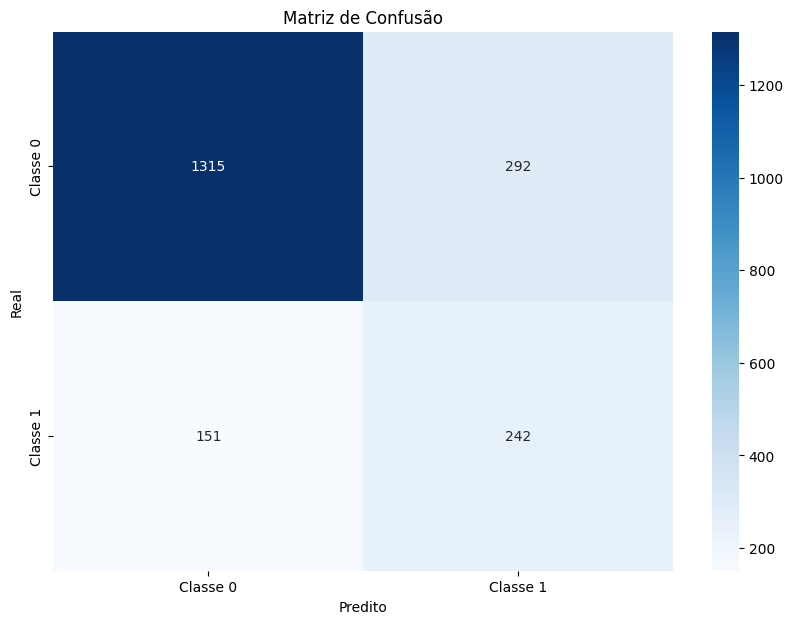

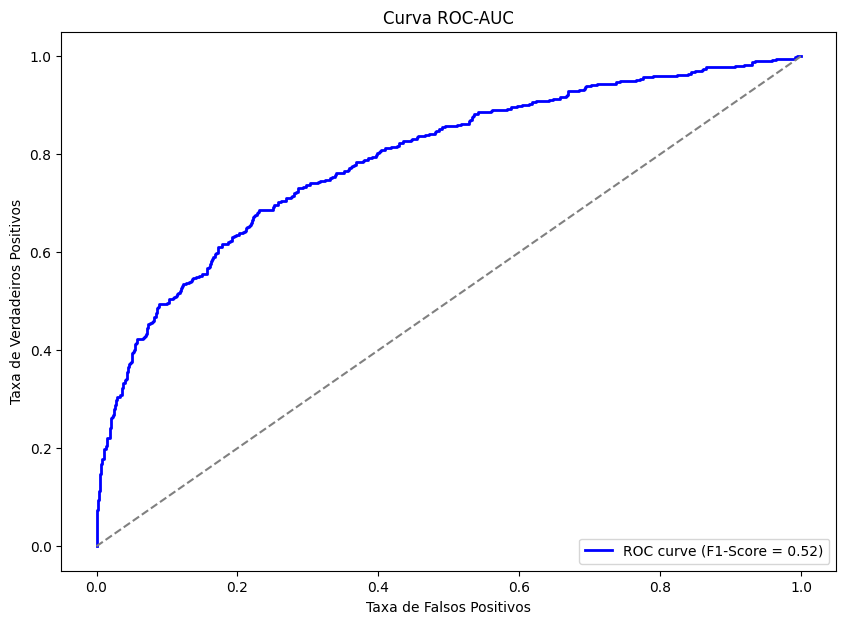

[I 2024-12-22 05:48:55,955] Trial 0 finished with value: 0.5221143473570657 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'epochs': 500, 'batch_size': 32}. Best is trial 0 with value: 0.5221143473570657.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.


------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8318
Acurácia: 0.7935
Precisão: 0.4824
Revocação: 0.6972
F1-Score: 0.5702
------------------------
------------------------


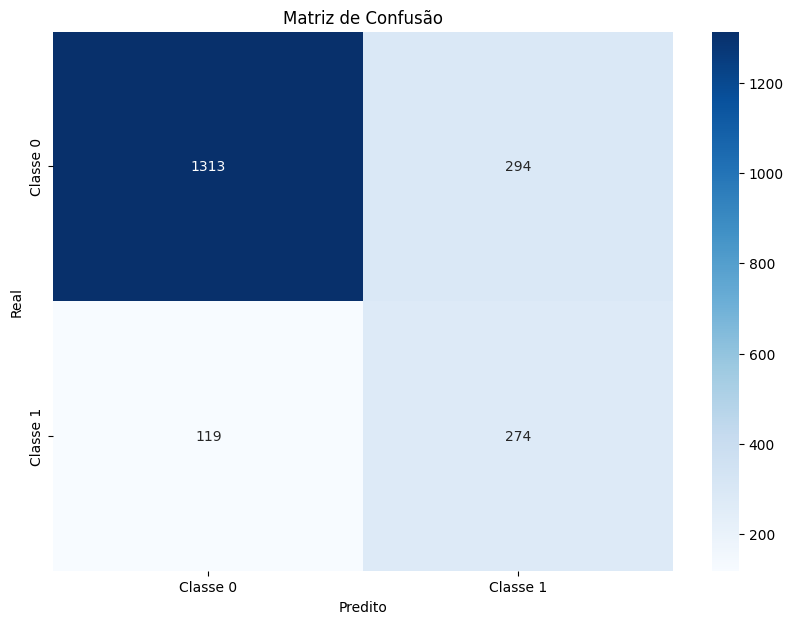

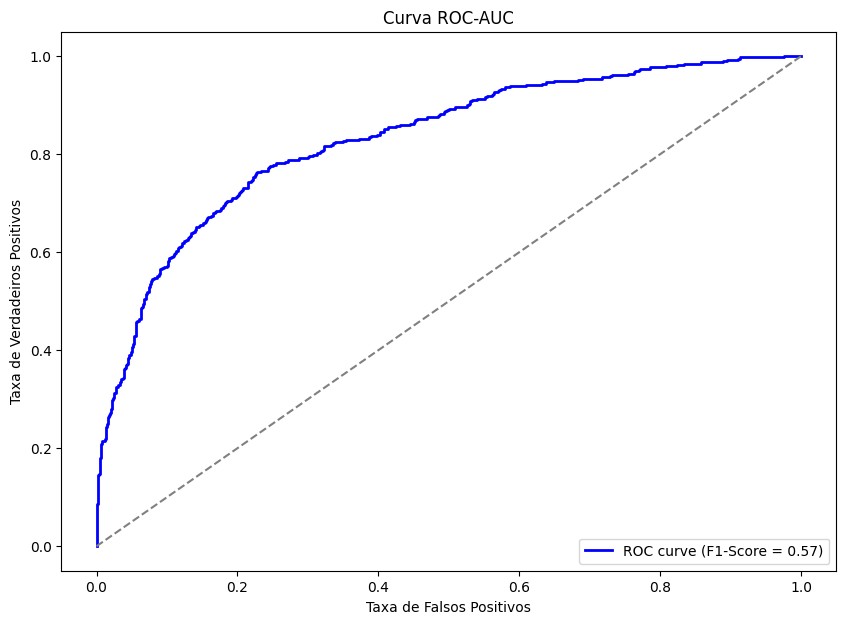

[I 2024-12-22 05:48:56,922] Trial 1 finished with value: 0.5702393340270552 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'epochs': 450, 'batch_size': 64}. Best is trial 1 with value: 0.5702393340270552.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.7894
Acurácia: 0.7770
Precisão: 0.4503
Revocação: 0.6107
F1-Score: 0.5184
------------------------
------------------------


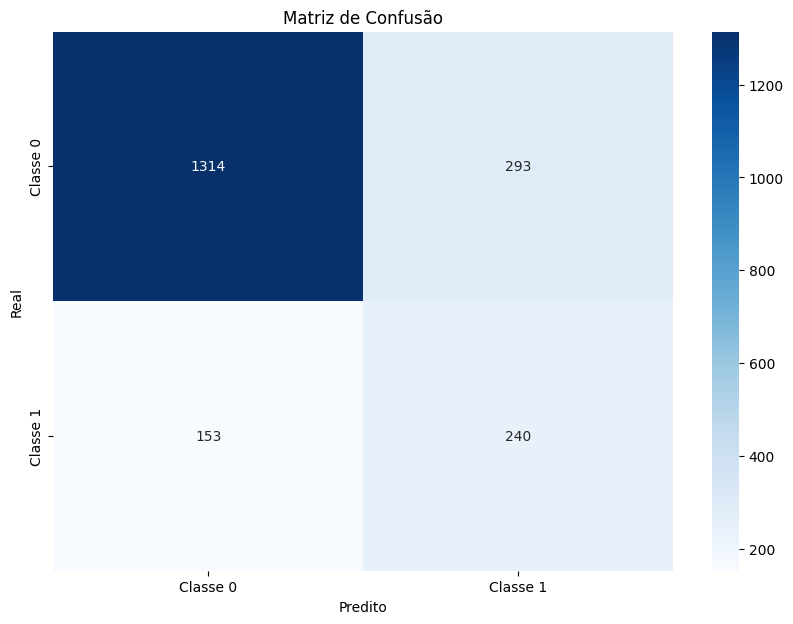

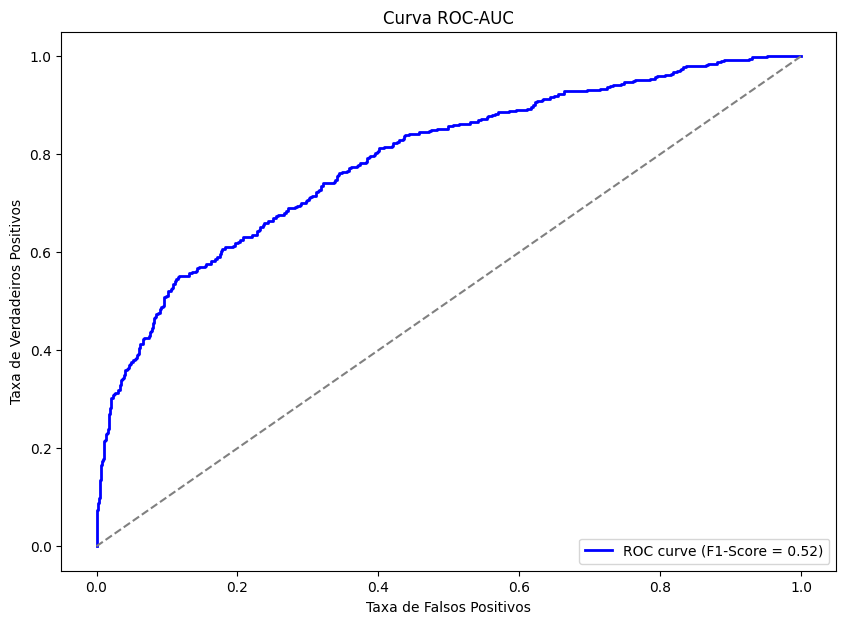

[I 2024-12-22 05:48:58,001] Trial 2 finished with value: 0.5183585313174947 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'epochs': 500, 'batch_size': 64}. Best is trial 1 with value: 0.5702393340270552.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.


------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.7985
Acurácia: 0.7335
Precisão: 0.4006
Revocação: 0.7176
F1-Score: 0.5141
------------------------
------------------------


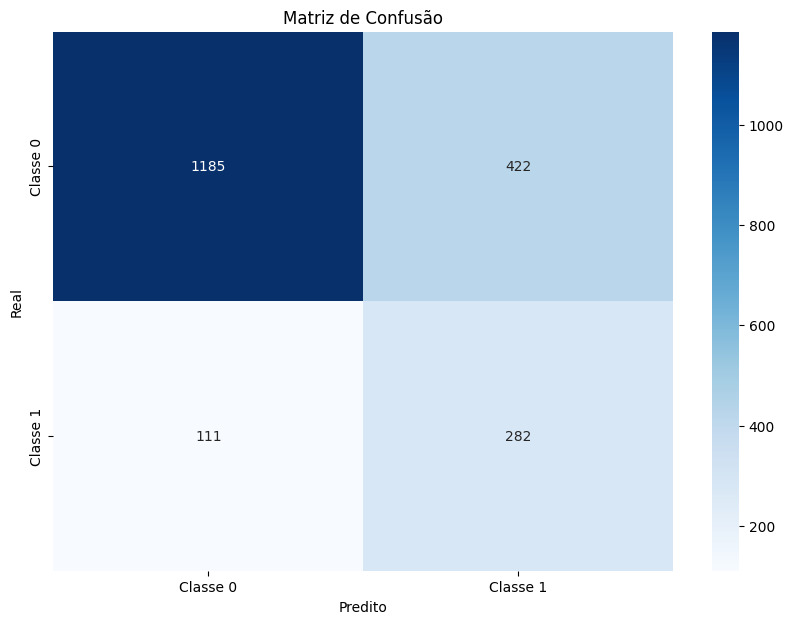

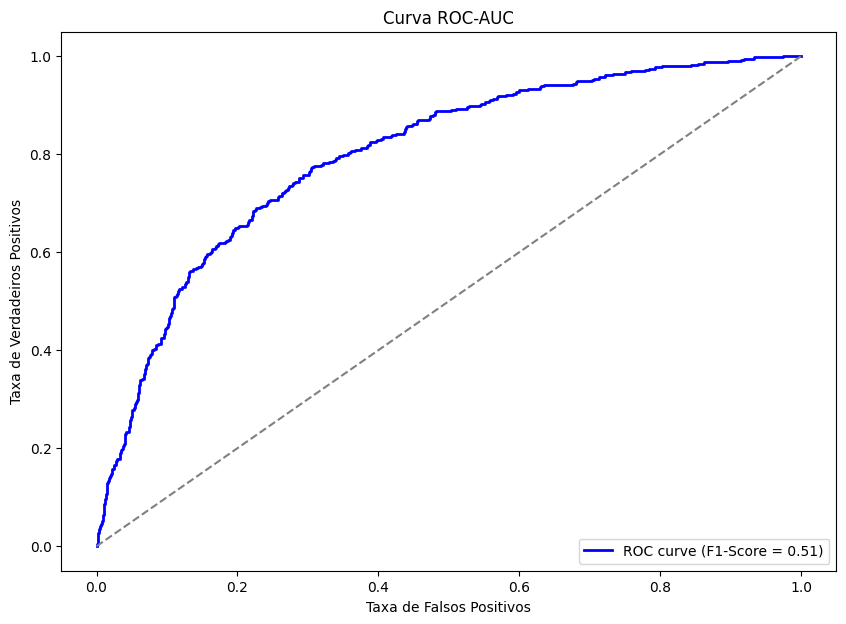

[I 2024-12-22 05:48:58,758] Trial 3 finished with value: 0.5141294439380129 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'epochs': 250, 'batch_size': 32}. Best is trial 1 with value: 0.5702393340270552.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  w

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8394
Acurácia: 0.7810
Precisão: 0.4643
Revocação: 0.7455
F1-Score: 0.5723
------------------------
------------------------


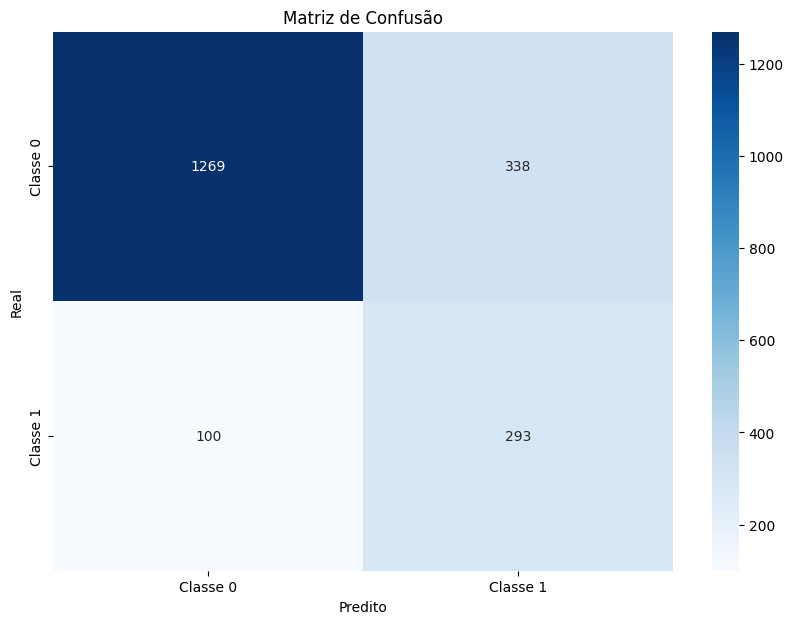

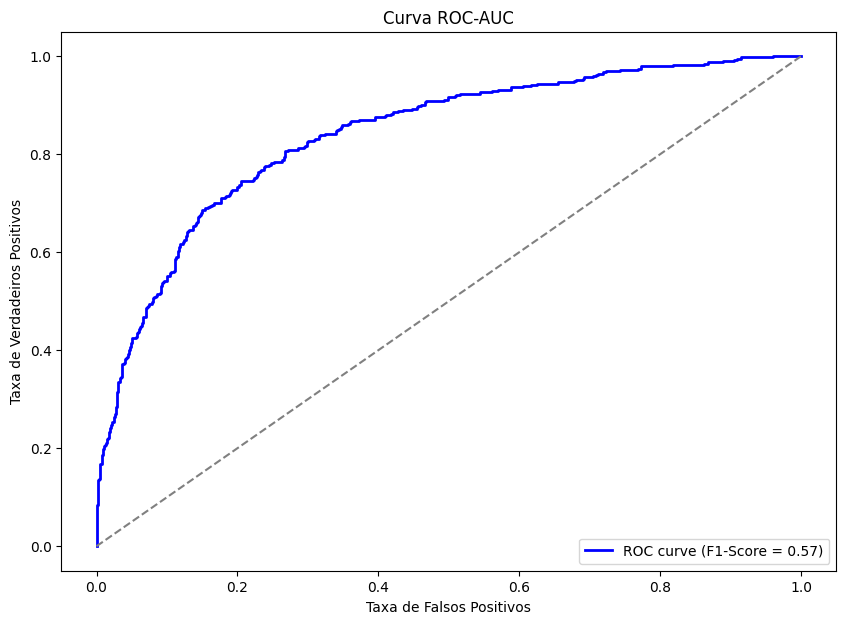

[I 2024-12-22 05:48:59,439] Trial 4 finished with value: 0.572265625 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 300, 'batch_size': 32}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(m

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8205
Acurácia: 0.7665
Precisão: 0.4399
Revocação: 0.6896
F1-Score: 0.5372
------------------------
------------------------


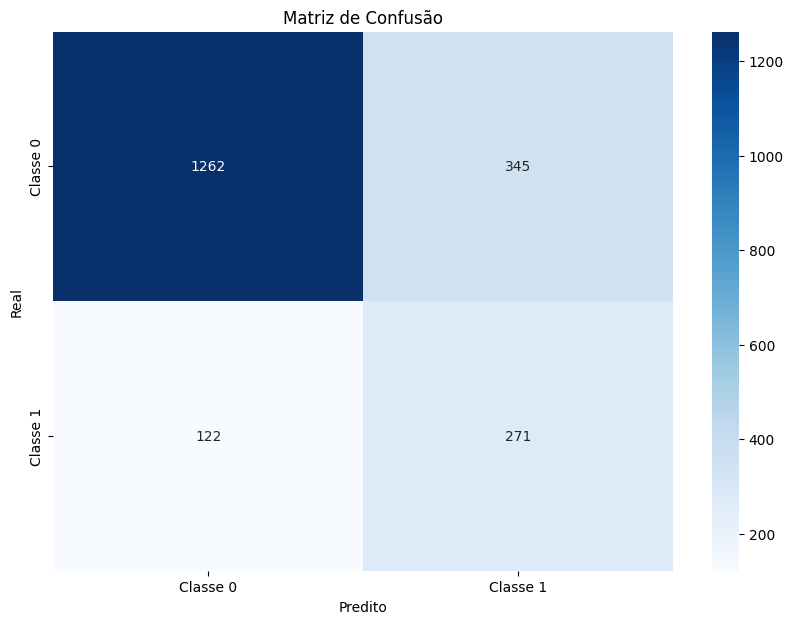

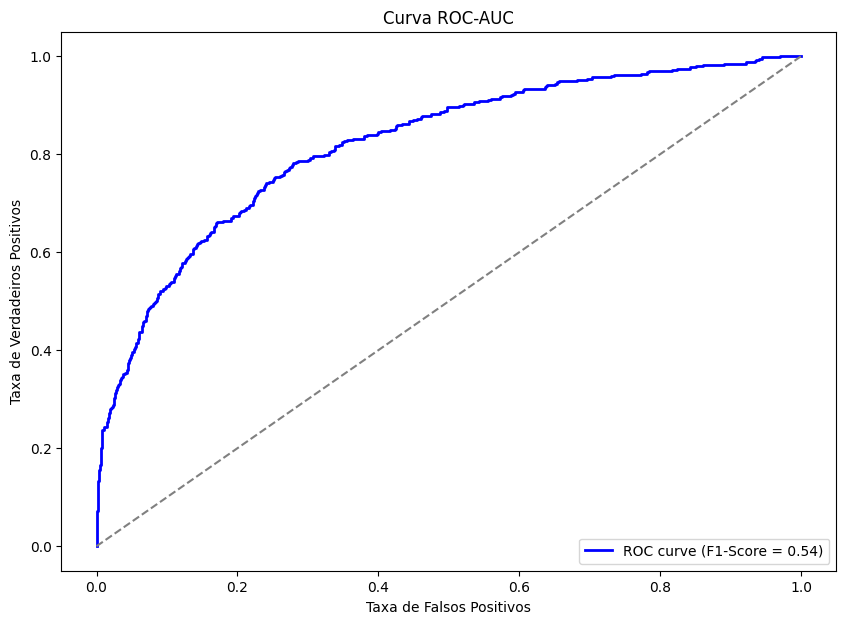

[I 2024-12-22 05:49:00,405] Trial 5 finished with value: 0.5371655104063429 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'epochs': 450, 'batch_size': 32}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warning

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8330
Acurácia: 0.7755
Precisão: 0.4560
Revocação: 0.7379
F1-Score: 0.5637
------------------------
------------------------


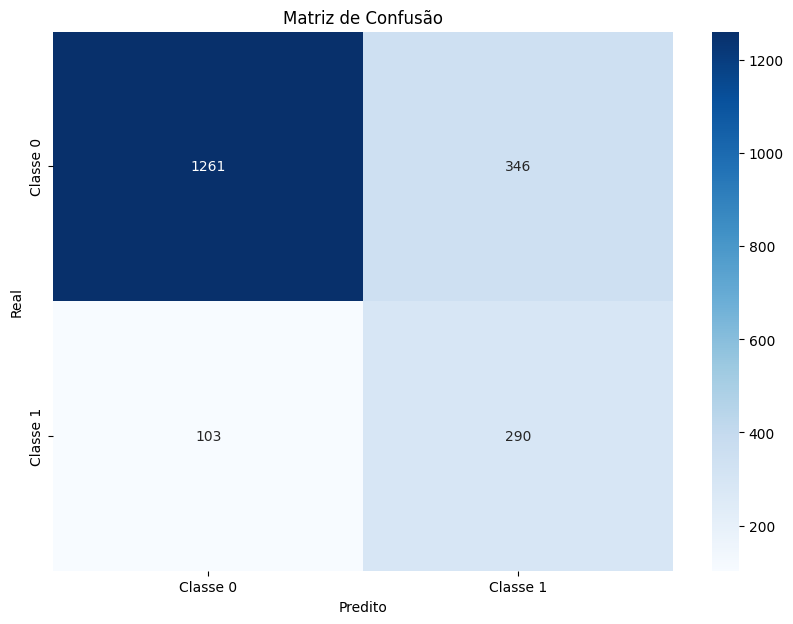

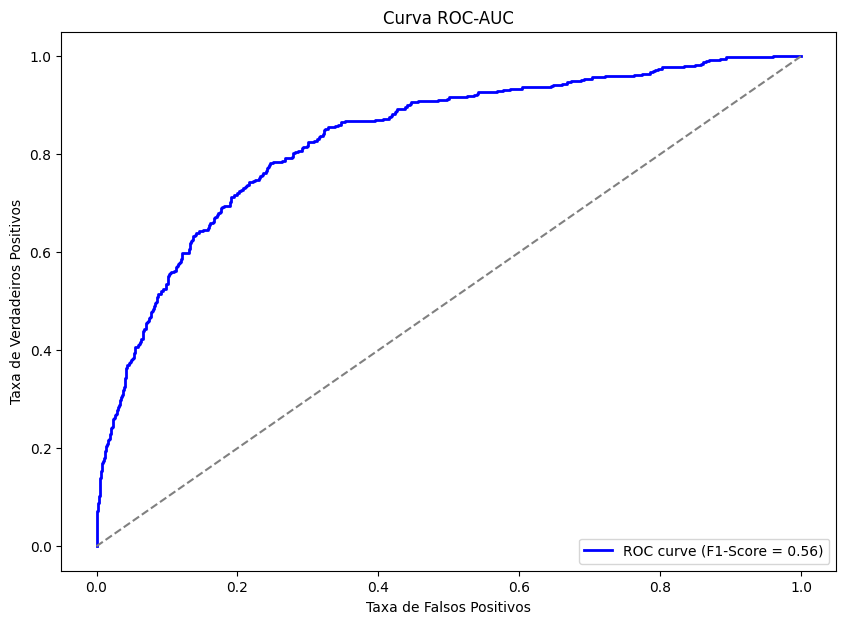

[I 2024-12-22 05:49:01,120] Trial 6 finished with value: 0.5636540330417882 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'epochs': 200, 'batch_size': 32}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warning

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8338
Acurácia: 0.7880
Precisão: 0.4740
Revocação: 0.7201
F1-Score: 0.5717
------------------------
------------------------


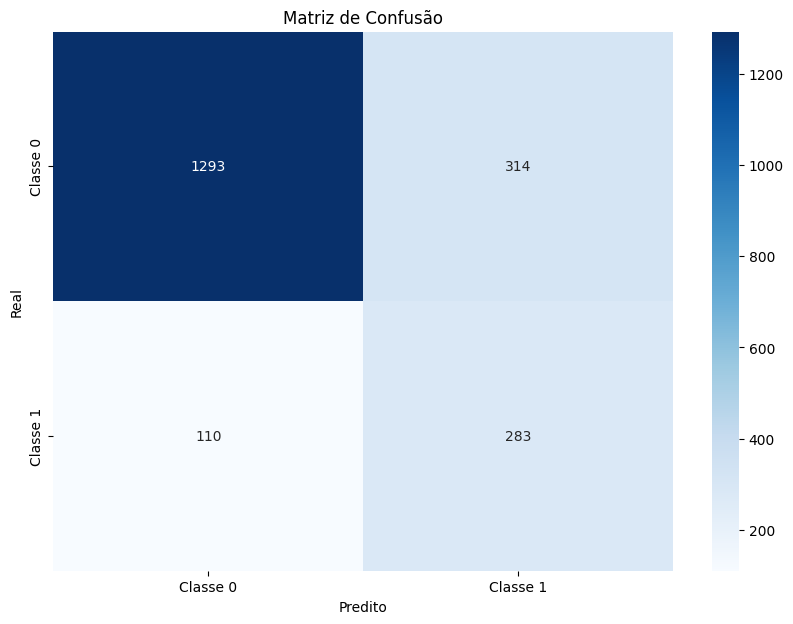

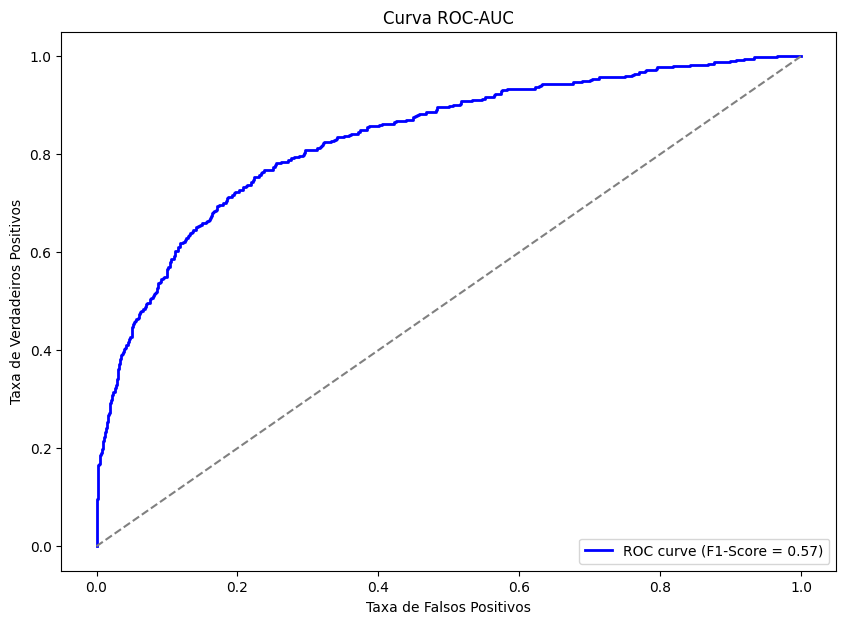

[I 2024-12-22 05:49:02,151] Trial 7 finished with value: 0.5717171717171717 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 500, 'batch_size': 64}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.7977
Acurácia: 0.7795
Precisão: 0.4570
Revocação: 0.6489
F1-Score: 0.5363
------------------------
------------------------


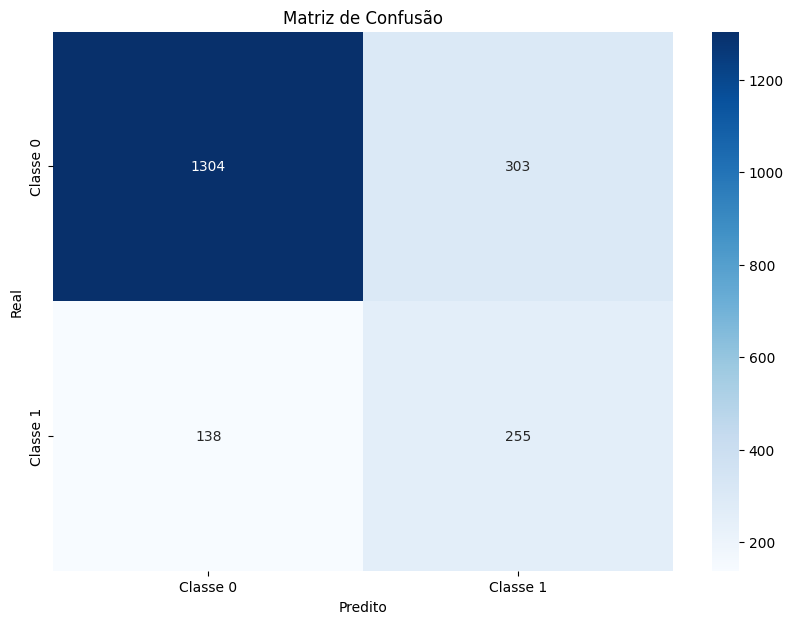

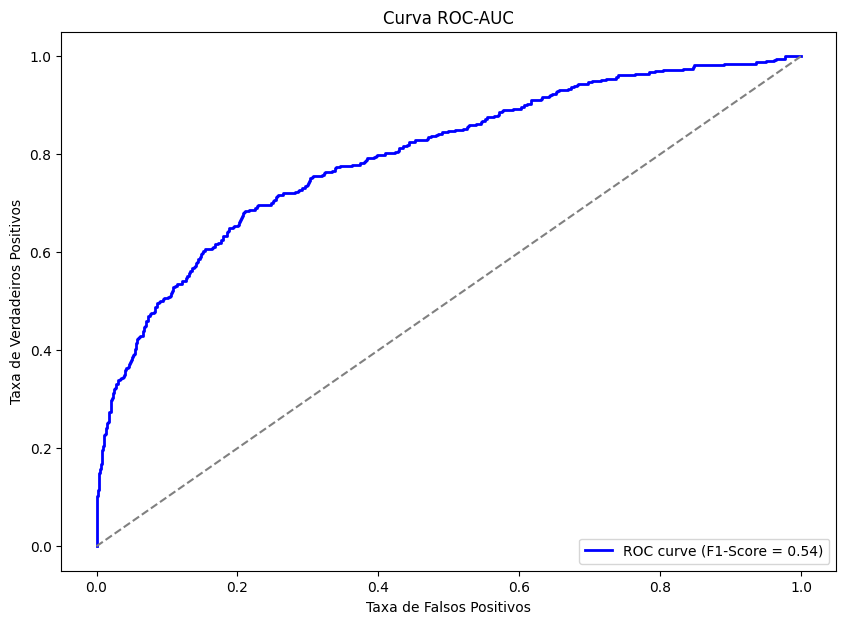

[I 2024-12-22 05:49:03,270] Trial 8 finished with value: 0.5362776025236593 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'epochs': 500, 'batch_size': 64}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warni

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8269
Acurácia: 0.7645
Precisão: 0.4396
Revocação: 0.7226
F1-Score: 0.5467
------------------------
------------------------


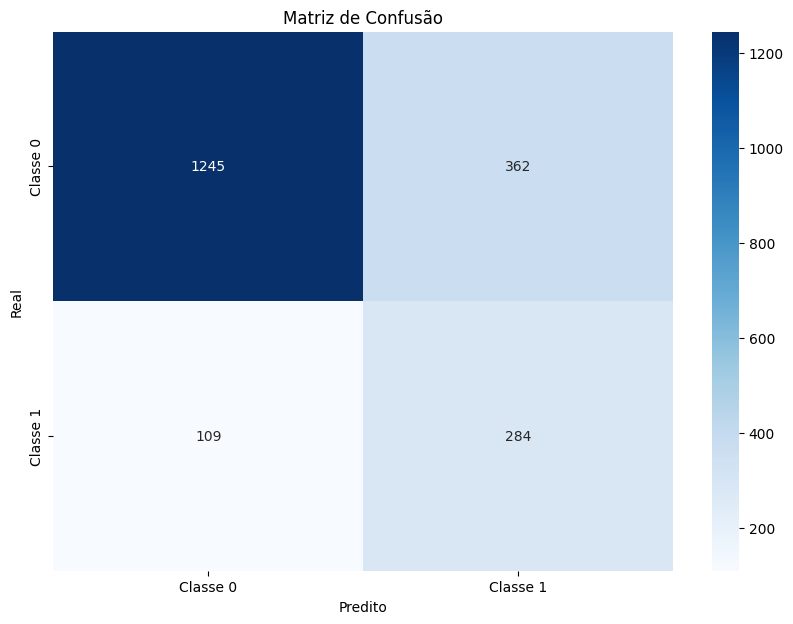

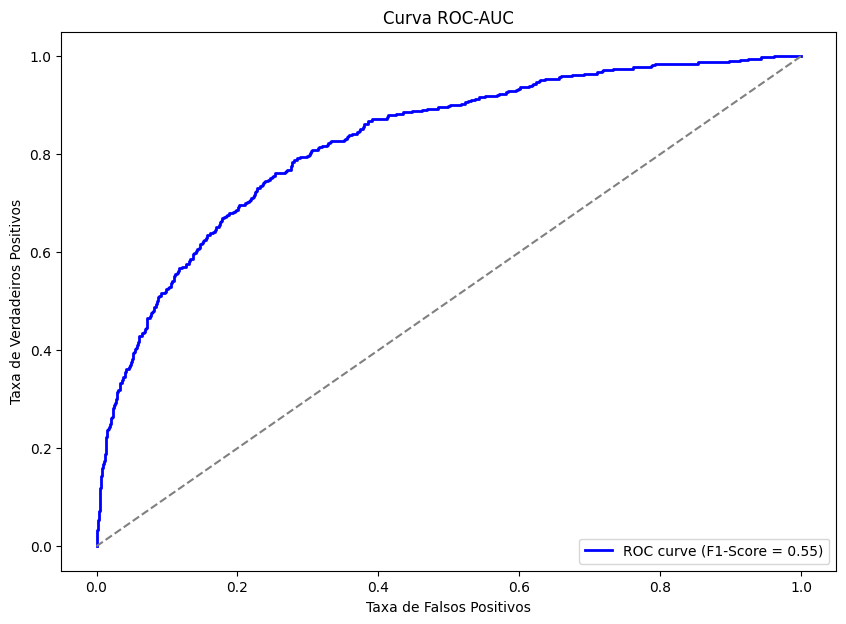

[I 2024-12-22 05:49:04,288] Trial 9 finished with value: 0.5466794995187682 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'epochs': 500, 'batch_size': 32}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8330
Acurácia: 0.7740
Precisão: 0.4532
Revocação: 0.7277
F1-Score: 0.5586
------------------------
------------------------


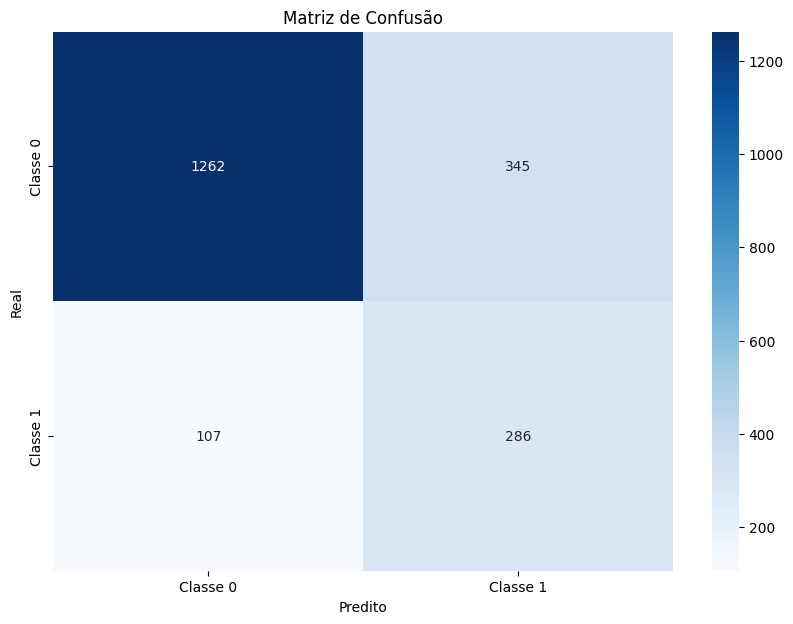

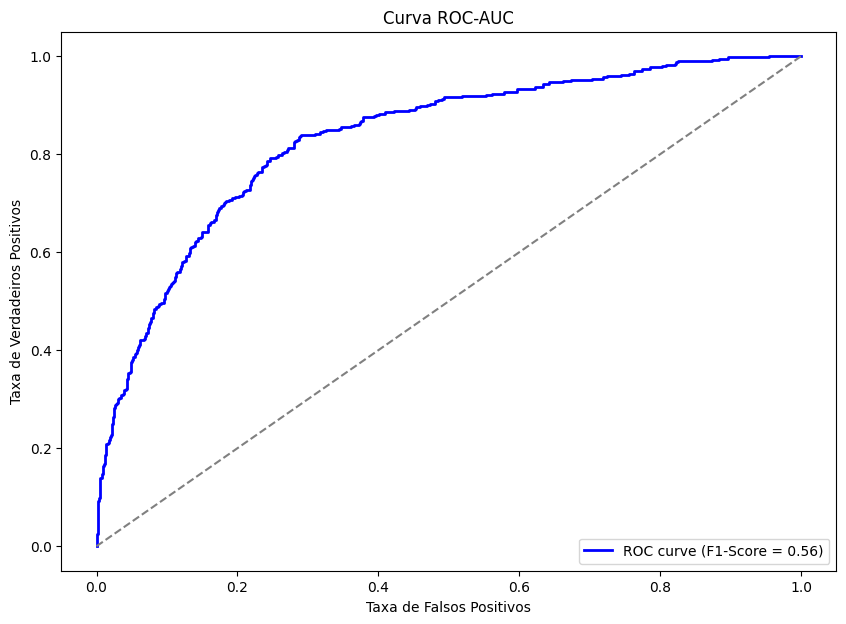

[I 2024-12-22 05:49:05,136] Trial 10 finished with value: 0.55859375 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 300, 'batch_size': 32}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(m

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8358
Acurácia: 0.7755
Precisão: 0.4556
Revocação: 0.7303
F1-Score: 0.5611
------------------------
------------------------


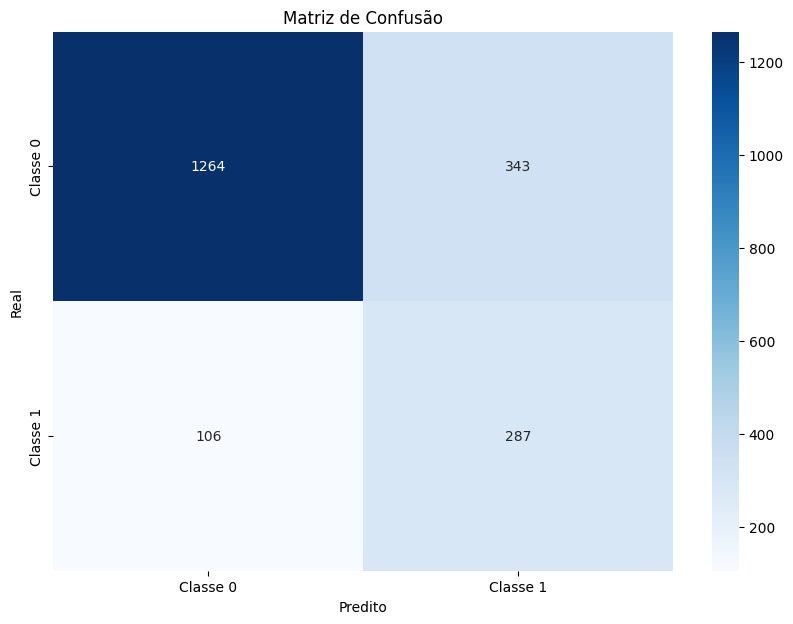

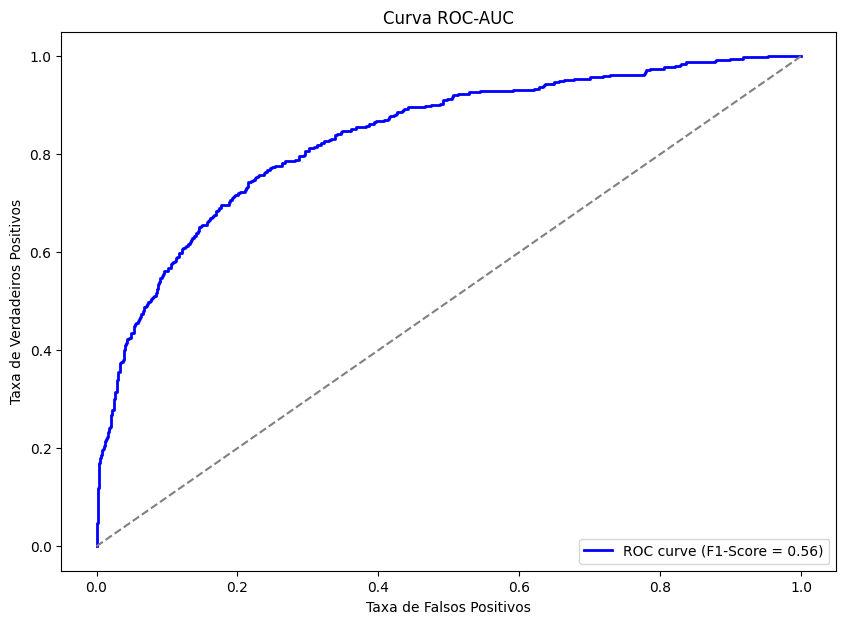

[I 2024-12-22 05:49:06,013] Trial 11 finished with value: 0.5610948191593352 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 350, 'batch_size': 64}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warning

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8360
Acurácia: 0.7810
Precisão: 0.4635
Revocação: 0.7277
F1-Score: 0.5663
------------------------
------------------------


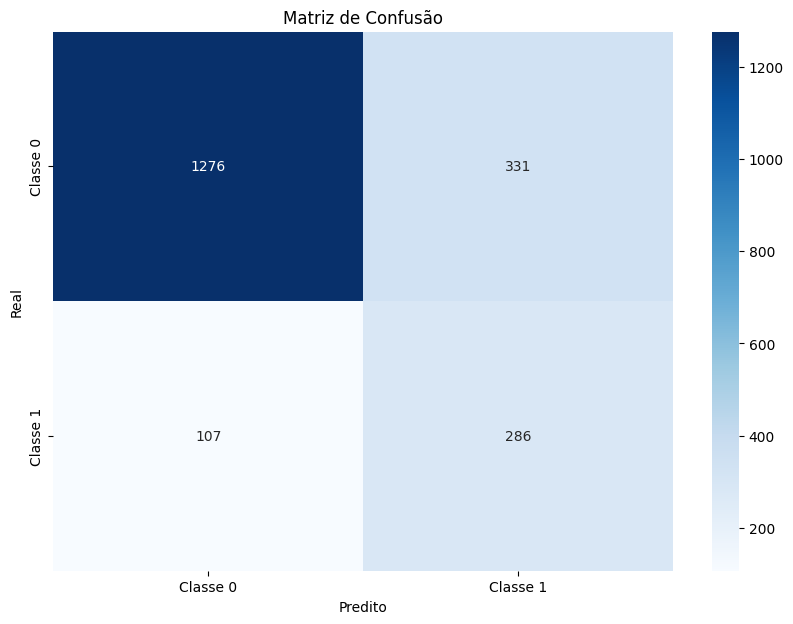

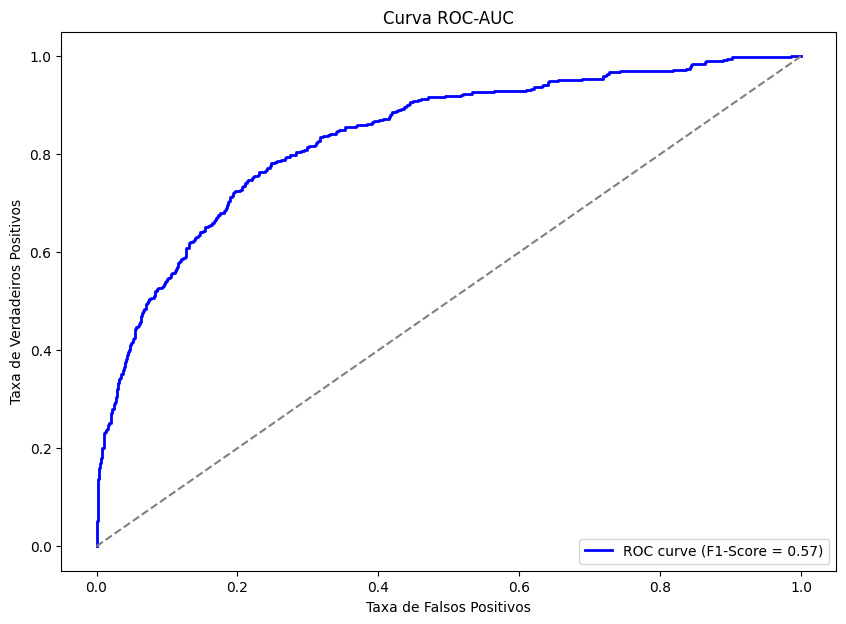

[I 2024-12-22 05:49:06,893] Trial 12 finished with value: 0.5663366336633664 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 350, 'batch_size': 64}. Best is trial 4 with value: 0.572265625.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warning

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8406
Acurácia: 0.7850
Precisão: 0.4698
Revocação: 0.7328
F1-Score: 0.5726
------------------------
------------------------


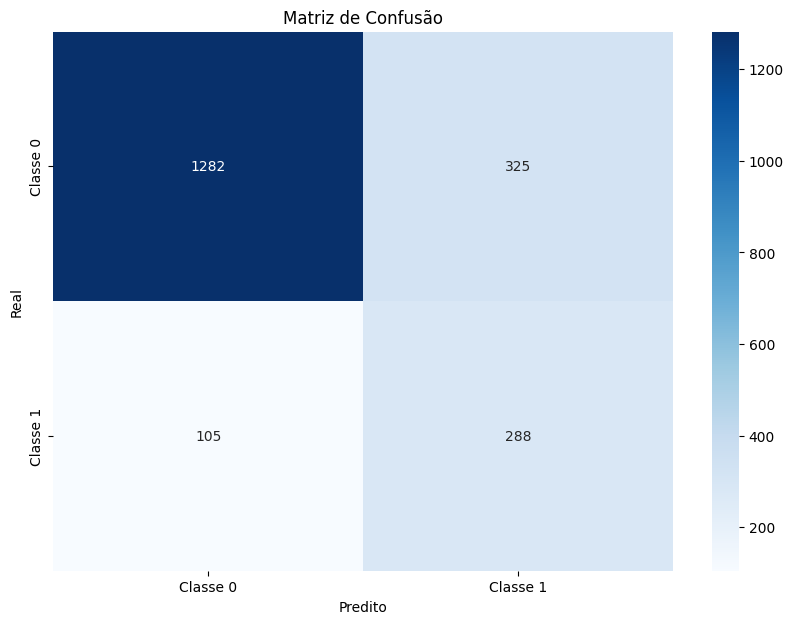

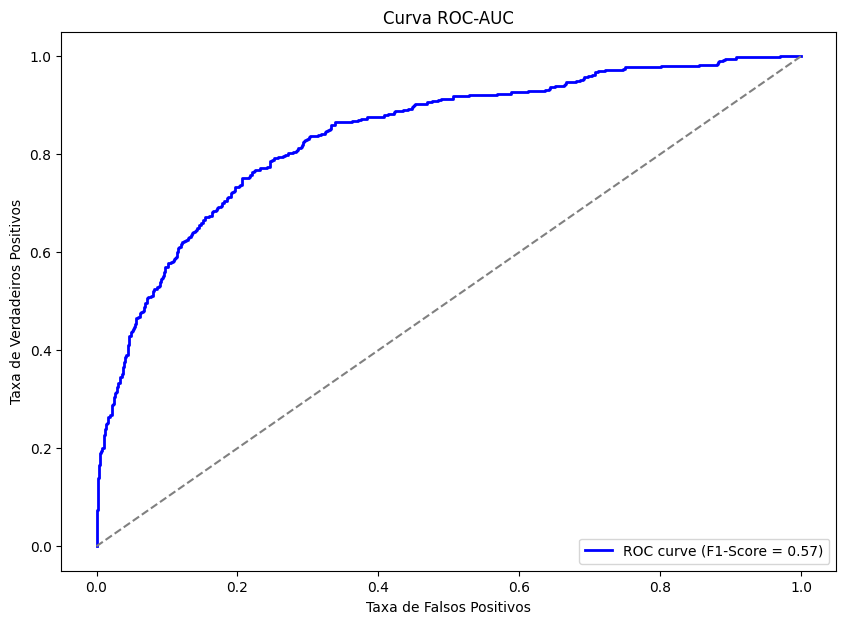

[I 2024-12-22 05:49:07,777] Trial 13 finished with value: 0.5725646123260438 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 350, 'batch_size': 64}. Best is trial 13 with value: 0.5725646123260438.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
 

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8405
Acurácia: 0.7810
Precisão: 0.4640
Revocação: 0.7379
F1-Score: 0.5697
------------------------
------------------------


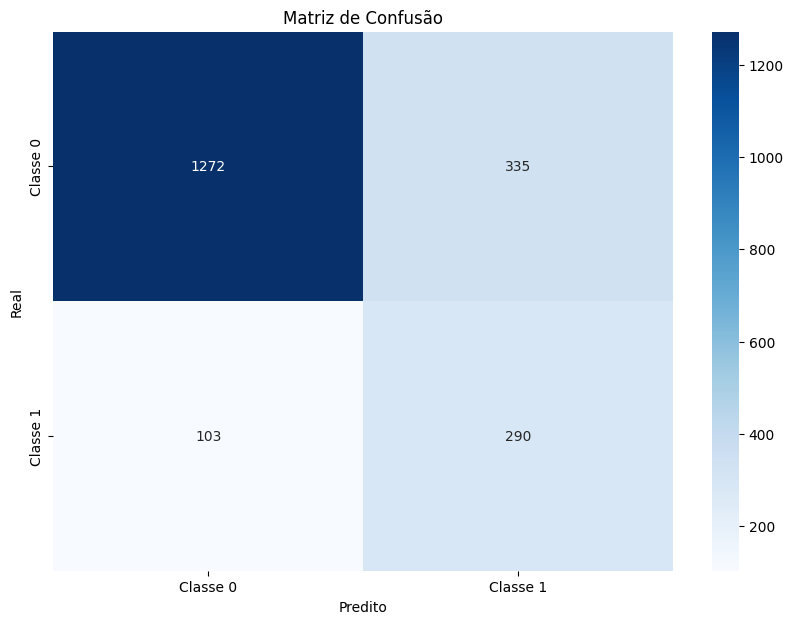

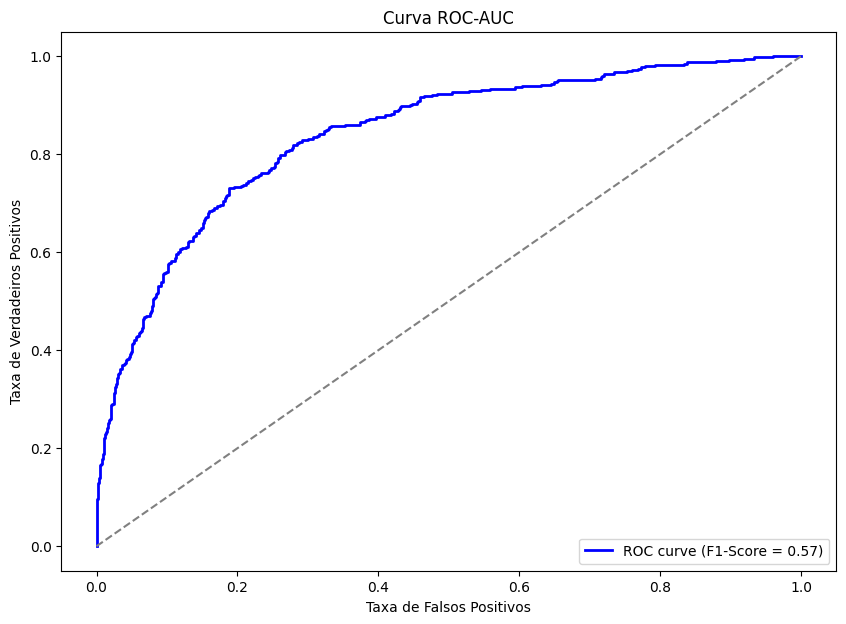

[I 2024-12-22 05:49:08,667] Trial 14 finished with value: 0.5697445972495089 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 350, 'batch_size': 64}. Best is trial 13 with value: 0.5725646123260438.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
 

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8397
Acurácia: 0.7790
Precisão: 0.4619
Revocação: 0.7557
F1-Score: 0.5734
------------------------
------------------------


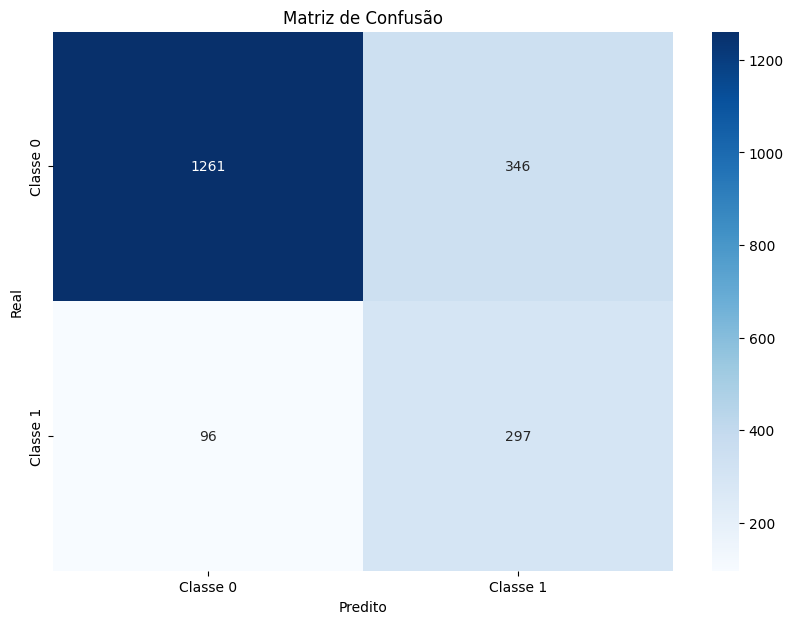

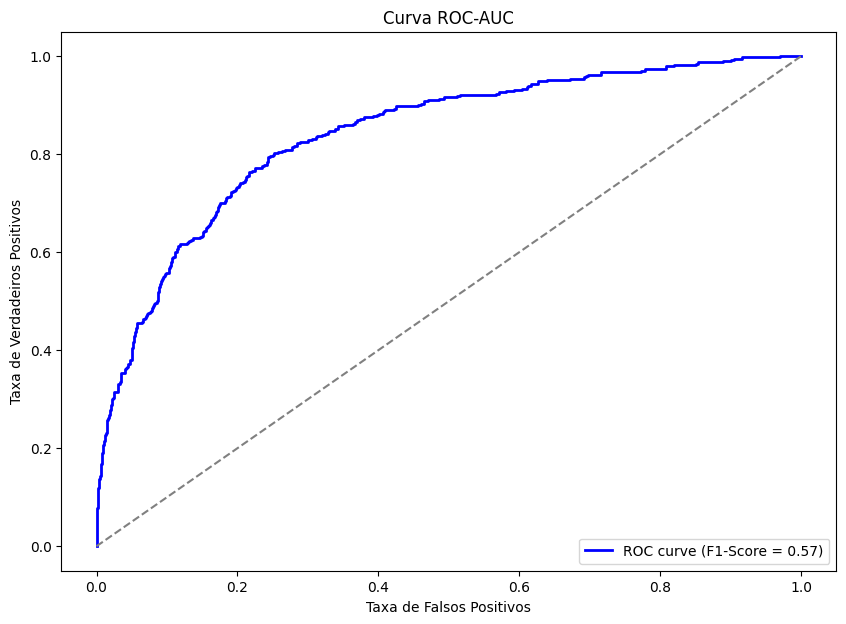

[I 2024-12-22 05:49:09,688] Trial 15 finished with value: 0.5733590733590733 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 300, 'batch_size': 32}. Best is trial 15 with value: 0.5733590733590733.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
 

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8324
Acurácia: 0.7890
Precisão: 0.4759
Revocação: 0.7277
F1-Score: 0.5755
------------------------
------------------------


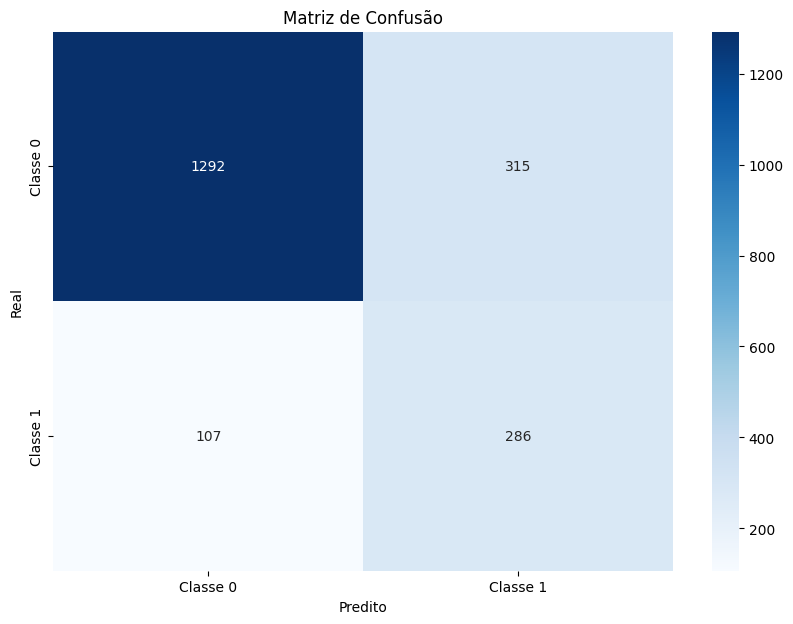

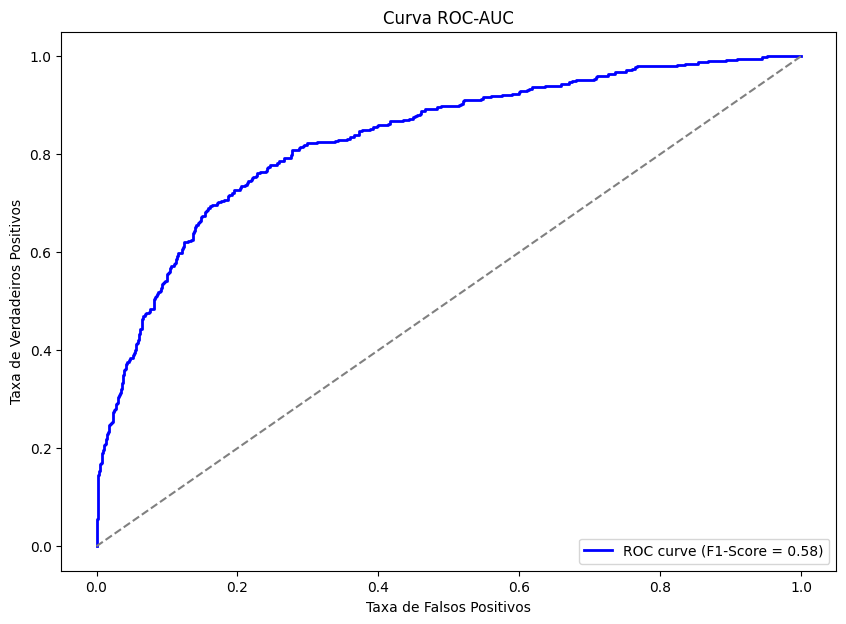

[I 2024-12-22 05:49:10,614] Trial 16 finished with value: 0.5754527162977867 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 400, 'batch_size': 32}. Best is trial 16 with value: 0.5754527162977867.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
 

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8400
Acurácia: 0.7755
Precisão: 0.4550
Revocação: 0.7201
F1-Score: 0.5576
------------------------
------------------------


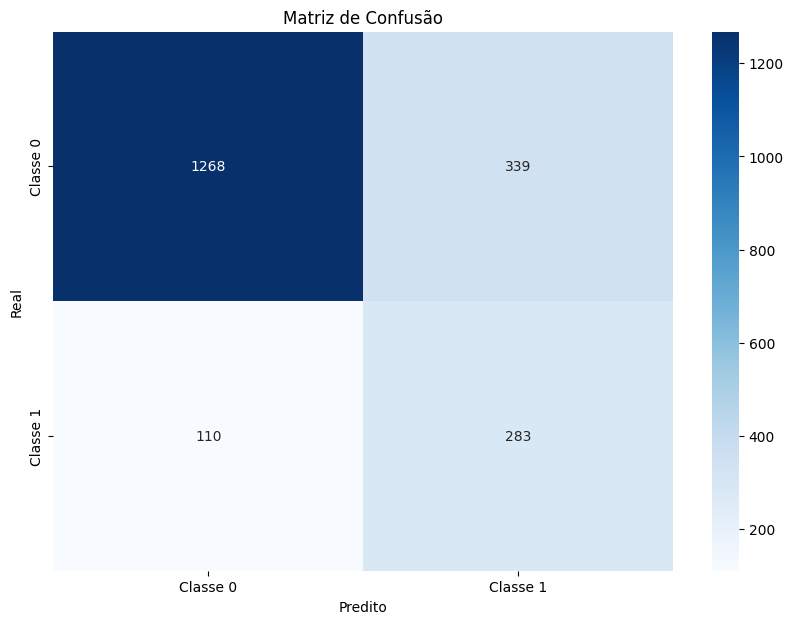

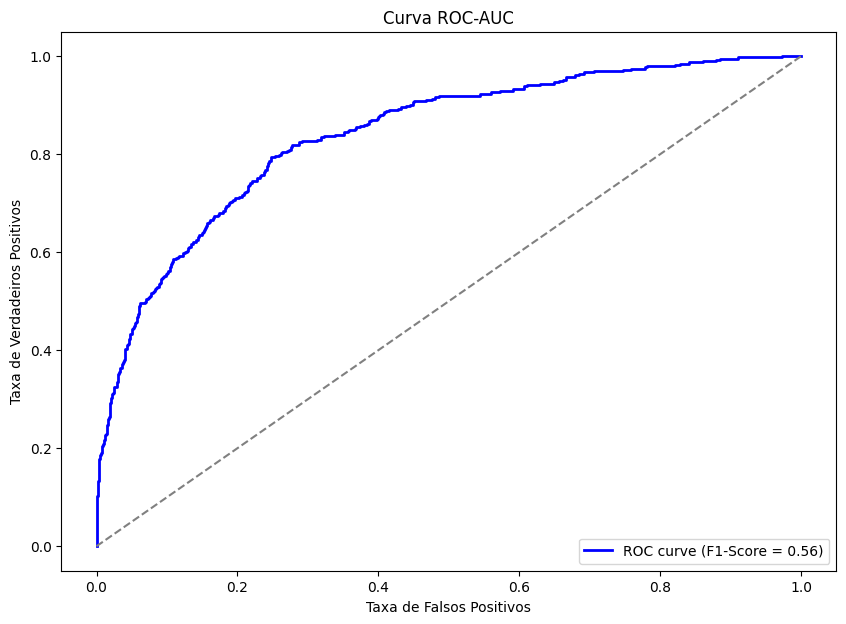

[I 2024-12-22 05:49:11,545] Trial 17 finished with value: 0.5576354679802956 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'epochs': 400, 'batch_size': 32}. Best is trial 16 with value: 0.5754527162977867.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
 

------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8369
Acurácia: 0.7950
Precisão: 0.4856
Revocação: 0.7277
F1-Score: 0.5825
------------------------
------------------------


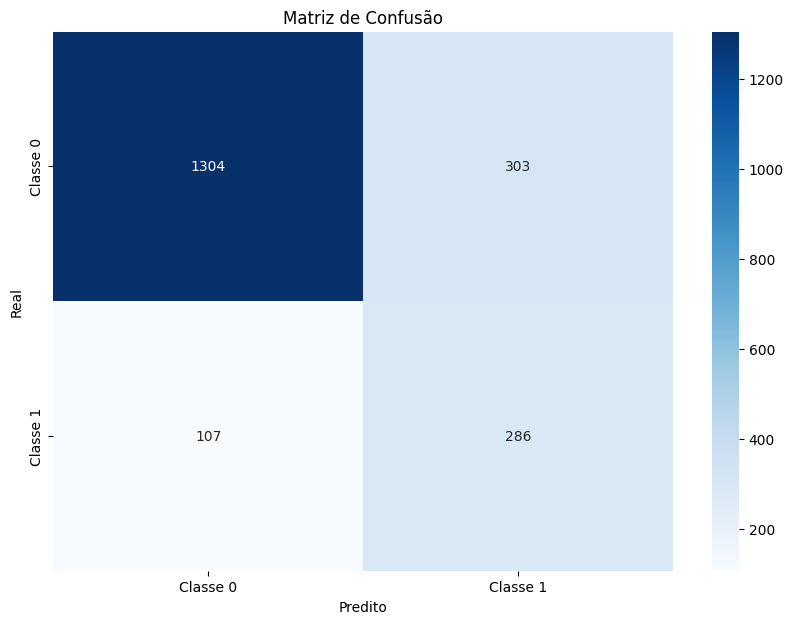

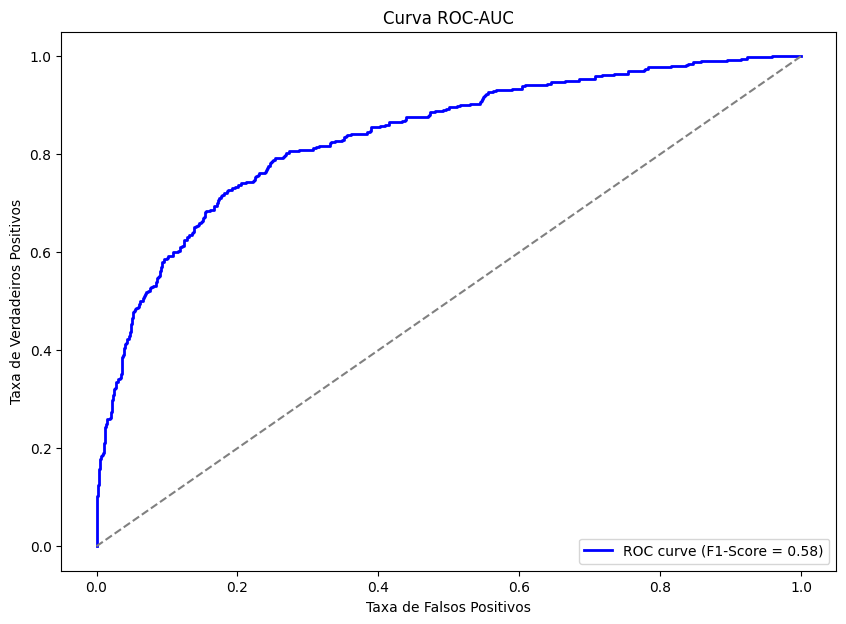

[I 2024-12-22 05:49:12,464] Trial 18 finished with value: 0.5824847250509165 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'epochs': 400, 'batch_size': 32}. Best is trial 18 with value: 0.5824847250509165.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.


------------------------

Métricas do Conjunto de Teste para o Modelo Neural (Cenário 3):
ROC AUC: 0.8335
Acurácia: 0.7855
Precisão: 0.4695
Revocação: 0.7048
F1-Score: 0.5636
------------------------
------------------------


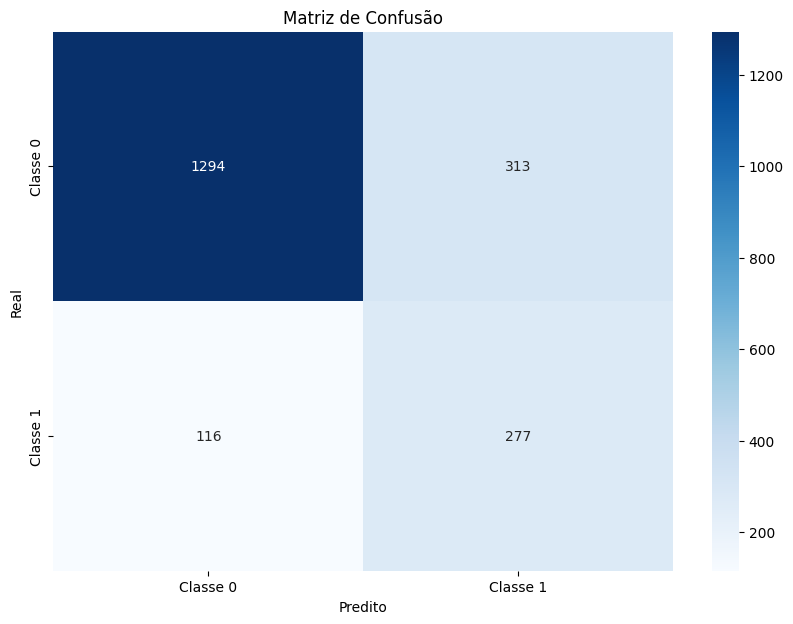

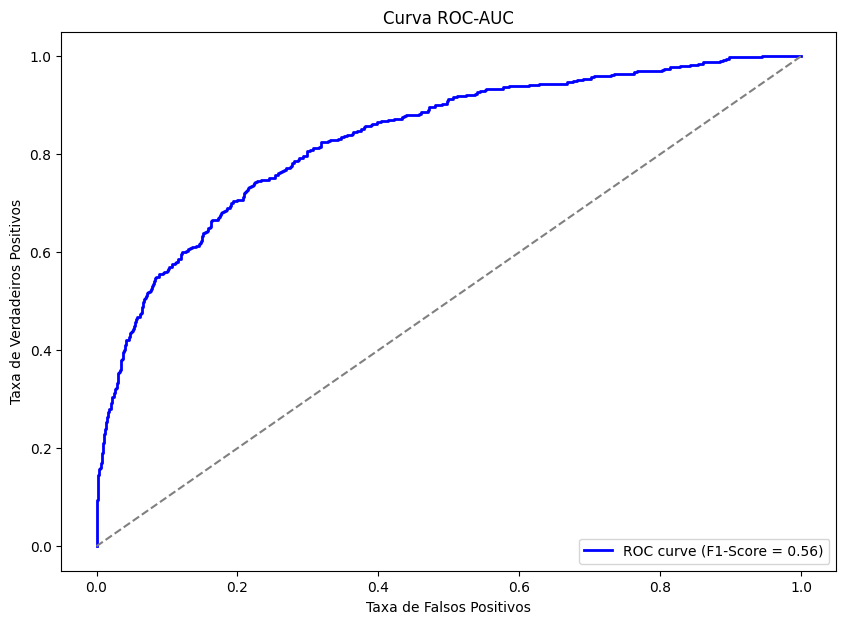

[I 2024-12-22 05:49:13,411] Trial 19 finished with value: 0.5635808748728383 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'epochs': 400, 'batch_size': 32}. Best is trial 18 with value: 0.5824847250509165.


Melhores parâmetros: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'epochs': 400, 'batch_size': 32}
------------------------
Início: 2024-12-22 02:48:52.847118
------------------------
------------------------
Fim: 2024-12-22 02:49:13.412841
------------------------


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

print('------------------------')
print("MLP - Multi-Layer Perceptron ")
print('------------------------')
# início
start_time_utc = datetime.utcnow() - timedelta(hours=3)
print('------------------------')
print("Início:", start_time_utc)
print('------------------------')


# Normalizando os dados de treinamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Convertendo para tensores PyTorch
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).cuda()
y_train_tensor = torch.tensor(y_train_res, dtype=torch.float32).cuda()
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).cuda()
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).cuda()

# Função para criar o modelo MLP
def create_model(hidden_layer_sizes, activation='relu'):
    class MLP(nn.Module):
        def __init__(self):
            super(MLP, self).__init__()
            self.layers = nn.ModuleList()
            input_size = X_train_tensor.shape[1]
            for units in hidden_layer_sizes:
                self.layers.append(nn.Linear(input_size, units))
                input_size = units
            self.output = nn.Linear(input_size, 1)
            self.activation_fn = torch.relu if activation == 'relu' else torch.tanh
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            for layer in self.layers:
                x = self.activation_fn(layer(x))
            x = self.sigmoid(self.output(x))
            return x

    model = MLP().cuda()
    criterion = nn.BCELoss()

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    return model, criterion, optimizer

# Função de objetivo para o Optuna
def objective(trial):
    # Definição dos hiperparâmetros
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    epochs = trial.suggest_int('epochs', 200, 500, step=50)
    batch_size = trial.suggest_categorical('batch_size', [32, 64])

    # Criando o modelo
    model, criterion, optimizer = create_model(hidden_layer_sizes=hidden_layer_sizes, activation=activation)

    # Treinamento
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train_tensor).squeeze()
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Avaliação
    model.eval()
    y_pred_prob_test = model(X_test_tensor).cpu().detach().numpy().squeeze()
    y_pred_test = (y_pred_prob_test > 0.5).astype(int)

    # Cálculo das métricas
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob_test)

    # Exibir as métricas
    print('------------------------')
    print("\nMétricas do Conjunto de Teste para o Modelo Neural (Cenário 3):")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print('------------------------')
    print('------------------------')

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    # Curva ROC-AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (F1-Score = {f1:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC-AUC')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.legend(loc='lower right')
    plt.show()

    return f1

# Executando a otimização
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print(f"Melhores parâmetros: {study.best_params}")

# início
print('------------------------')
print("Início:", start_time_utc)
print('------------------------')

# fim
end_time_utc = datetime.utcnow() - timedelta(hours=3)
print('------------------------')
print("Fim:", end_time_utc)
print('------------------------')
